# Quantifying the Zone of Proximal Development and Reciprocity
## *A network analysis approach for measuring performance and teamwork through flow dynamics*


## 1. Introduction

### 1.1 Objective

The meaning of life can vary depending on the philosophical domain or the subjective experience of a person, but I have found the best articulation of it to be the maximization in the zone of proximal development and healthy reciprocity (ZPD-R). This can manifest in a multitude of ways, but sports, specifically flow sports, represent a seemingly ideal microcosm to study this phenomenon. At the highest level, athletes compete in that zone of proximal development and require ample healthy reciprocity to not just win a singular game but win championships and create legendary dynasties. In this paper, I will outline the ideologies and assumptions behind this philosophy, and I will then use Network Science to quantify and analyze it. For the Network Science portion, I will start by attempting to replicate another study, Quantifying the Performance of Individual Players in a Team Activity (Duch, et al.), and then expand on their approach.

I hypothesize that we can measure the prominence of the zone of proximal development and healthy reciprocity through network analysis of sports games, and this quantification yields insight into the success of a given individual team member in an engaged team activity.

### 1.2 Table of Contents

 - 1. Introduction
     - 1.1 Objective
     - 1.2 Table of Contents
     - 1.3 Qualitative & Quantitative Data
     - 1.4 The Philosophy of Sport
     - 1.5 Quantifying the Performance of Individual Players in a Team Activity (Duch, et al.)
 - 2. Network Modeling with Flow Centrality
     - 2.1 Betweenness Centrality
     - 2.2 Assessment of Player Performance
 - 3. Network Modeling with Flow Dominance
     - 3.1 Hubs & Authorities
     - 3.1 Assessment of Player Performance
 - 4. Match Performance & Overall Evaluation
     - 4.1 Match Performance by Game
     - 4.2 AUC and ROC Analysis
     - 4.3 Correlation to Traditional Metrics
 - 5. Final Analysis & Conclusion

### 1.3 Qualitative & Quantitative Data

Qualitative:  <br />
The Zone of Proximal Development (Vygotsky): https://www.simplypsychology.org/Zone-of-Proximal-Development.html  <br />
Three Forms of Meaning and the Management of Complexity (Peterson): https://www.jordanbpeterson.com/docs/434/Assigned_Papers/Peterson%20JB%20Three%20Kinds%20of%20Meaning%20Final%203.pdf  <br />
Quantifying the Performance of Individual Players in a Team Activity (Duch, et al.: https://amaral.northwestern.edu/media/publication_pdfs/journal.pone.0010937.pdf <br />
The Stranger by Albert Camus <br />
Zen and the Art of Motorcycle Maintenance by Robert Pirsig <br />

Quantitative:  <br />
The data will be extracted from nba_api (https://pypi.org/project/nba-api/), specifically these endpoints:
1. playerdashptpass
2. leaguegamefinder
3. commonallplayers
4. commonplayerinfo
5. cumestatsplayer

As a disclaimer, the nba_api is relatively new and may not contain all data for passes for the previous year's season. This could easily skew or bias the data presented here. Data quality and going only off of my interpretation of Duch et al.'s piece could lead to some minor missteps that I do not intend.

### 1.4 The Philosophy of Sport

Lev Vygotsky (Russian psychologist) defined the Zone of Proximal Development (ZPD) which is a space in an engaged activity that is just above the reach of current abilities and thus requires some guidance to master. Vygotsky believed that being in this presence required three things: 1. The presence of someone with knowledge and skills beyond that of the learner (a more knowledgeable other), 2. Social interactions with a skillful tutor that allow the learner to observe and practice their skills, and 3. Scaffolding, or supportive activities provided by the educator, or more competent peer, to support the student as he or she is led through the ZPD. This zone represents the maximum utilization of positive emotions and creative thought balanced with the regulation of pain and anxiety to prevent overextension of abilities. I believe this is also where the concept of ‘the zone’ and ‘flow state’ come from – this hyper-engaged state of pushing your boundaries and limitations in proximal objectives.
 
When we think about sport, it is the dramatization of this activity. It represents athletes at their highest potential focusing on a multitude of proximal objectives with the vision to keep bettering themselves every day. There is something innate to our being that gets tapped into and activated when we are engaged in such activities, but the issue is that we do not always know what or when those activities can manifest (as they would not be sports for every person). It takes a hyper awareness of self to really find those pockets in a day that you find yourself in that zone, but even when you find it – how do you stay in it for an extended period? This pursuit of finding the zone and staying in it is what I have come to believe represents the true meaning of sport, but it is only half of the picture.
 
They say when you play a sport, it is not about whether you win or lose but how you play the game. The articulation of this thought in concrete terms past this can get murky, but the reason why how you play matters is that winning one singular game isn’t the real goal. The real goal is to win championships or have a legendary dynasty; in other words - win many, many games. The route to winning multiple games is heavily influenced by how you play a singular game because you attract people to want to play with you. The reciprocity one exhibits dramatically influences how likely they are to have people who want to play with them, and this represents the other half.
 
To summarize, I have discovered the meaning of life to be a relentless competition of in the zone of proximal development. This zone is specifically an area that requires some amount of guidance/encouragement to complete and its reliance on those around you begets a need for high reciprocity. In this paper, I look to the highest level of basketball, the NBA Finals, to study the intersection of a person's ability to be in the zone and exhibit healthy reciprocity.

The idealogoies and assumptions here are largely inspired and educated by Lev Vygotsky, Dr. Jordan Peterson, Albert Camus, and Robert Pirsig.

### 1.5 Quantifying the Performance of Individual Players in a Team Activity (Duch, et al.)

The authors in this paper study the European Cup 2008 soccer tournament through passing dynamics to assess player performance in a given match, and their contributions averaged to the team as a whole. The paper hypothesizes that network science can be a strong approach for the quantification of contributions of individual team members. They suggest that network science modeling can be used to garner insight into complex social phenomena through the averaged player contributions in a given network.

Duch, et al. started with each player's passing data by assessing the frequency a player passed to any given teammate of all passes that player made in a game. Then, this Pass Frequency was normalized by the mean and standard deviation of the Pass Frequency for that player's position. In my study, I obtained all the passes made by players in the regular/playoffs for 2019-2020 only, so not all time. Since that operation can be computationally taxing, I completed it once and exported to a .pkl file, which I start this narrative by importing (alongside each of the two team's passing data).

Furthermore, Duch et al. modeled the successful passes made in a game as edges in a network and the players as nodes. Additionally, they added 2 non-player nodes of whether the shot was made or not. The Pass Frequency was log normalized and a team's network for a game, each player's (or node's) betweenness centrality represented what they denoted as 'flow centrality'. This metric represented how often a player came in between their team's goal of making a shot, and the log normalized flow centrality resulted in Player Performance.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns
import networkx as nx
import pickle
import time
import warnings
warnings.filterwarnings("ignore")

from nba_api.stats.static import teams
from nba_api.stats.static import players

from nba_api.stats.endpoints import playerdashptpass
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.endpoints import commonallplayers
from nba_api.stats.endpoints import commonplayerinfo
from nba_api.stats.endpoints import cumestatsplayer

In [3]:
def getPlayersbyTeam(season, team_id):
    allplayers = commonallplayers.CommonAllPlayers(season=season)
    allplayers = allplayers.get_data_frames()[0]
    team_players = allplayers[allplayers['TEAM_ID'] == team_id]
    time.sleep(.600)
    return team_players[['TEAM_ID', 'PERSON_ID', 'DISPLAY_LAST_COMMA_FIRST']].values.tolist()

def getBothTeamIDs(team1, team2, season):

    nba_teams = teams.get_teams()
    time.sleep(.600)

    nba_players = players.get_players()
    time.sleep(.600)

    team1_ID = [x['id'] for x in nba_teams if x['nickname'] == team1][0]
    team2_ID = [x['id'] for x in nba_teams if x['nickname'] == team2][0]

    team1_players = getPlayersbyTeam(season, team1_ID)
    team2_players = getPlayersbyTeam(season, team2_ID)
    all_teams = [x['id'] for x in nba_teams]

    return team1_players, team2_players, all_teams

def getPlayerPosition(player_id):
    
    player_info = commonplayerinfo.CommonPlayerInfo(player_id=player_id)
    position = player_info.common_player_info.get_data_frame()['POSITION'][0]
    
    time.sleep(.600)
    return position

def getCleanedDataframes(passes_shots_df):
        
    norm_passes_shots_df = passes_shots_df.copy()
#     norm_passes_shots_df[['PASS_FREQUENCY', 'SHOT_MADE_FREQUENCY', 'SHOT_MISS_FREQUENCY']] = norm_passes_shots_df[['PASS_FREQUENCY', 'SHOT_MADE_FREQUENCY', 'SHOT_MISS_FREQUENCY']] * 100
    norm_passes_shots_df = norm_passes_shots_df.rename(columns={'PASS_FROM':'FROM', 'PASS_TO':'TO', 'PASS_FREQUENCY':'FREQUENCY'})
        
    norm_passes_shots_df['POSITION'] = norm_passes_shots_df['PLAYER_ID'].apply(lambda x : getPlayerPosition(x))
    norm_passes_shots_df = norm_passes_shots_df.merge(all_nba_passes_positions, on=['POSITION'], how='left')

    norm_passes_shots_df['FREQUENCY'] = (norm_passes_shots_df['FREQUENCY'] - norm_passes_shots_df['mean']) / norm_passes_shots_df['std']
    
    shot_made = norm_passes_shots_df[['TO', 'SHOT_MADE_FREQUENCY']].rename(columns={'TO':'FROM', 'SHOT_MADE_FREQUENCY':'FREQUENCY'})
    shot_made['TO'] = 'SHOT_MADE'
    shot_miss = norm_passes_shots_df[['TO', 'SHOT_MISS_FREQUENCY']].rename(columns={'TO':'FROM', 'SHOT_MISS_FREQUENCY':'FREQUENCY'})
    shot_miss['TO'] = 'SHOT_MISS'
    
#     network_df = passes_shots_df.drop(columns=['SHOT_MADE_FREQUENCY', 'SHOT_MISS_FREQUENCY', 'PLAYER_ID']).append(shot_made, sort=False).append(shot_miss, sort=False)
    norm_network_df = norm_passes_shots_df.drop(columns=['SHOT_MADE_FREQUENCY', 'SHOT_MISS_FREQUENCY', 'PLAYER_ID', 'mean', 'std', 'POSITION']).append(shot_made, sort=False).append(shot_miss, sort=False)
    
    power = PowerTransformer(method='yeo-johnson')
    norm_network_df = norm_network_df[norm_network_df['FREQUENCY'] > 0]
    norm_network_df['log_FREQUENCY'] = np.log(norm_network_df['FREQUENCY']+0j).to_numpy().real
    norm_network_df['norm_log_FREQUENCY'] = power.fit_transform(norm_network_df['log_FREQUENCY'].values.reshape(-1,1))
    
    return norm_network_df

def getFullNetwork(team1_network, team2_network, metric):
    
    norm_network_df = team1_network.append(team2_network, ignore_index=True)
    
    G_team1=nx.from_pandas_edgelist(team1_network, 'FROM', 'TO', 'FREQUENCY', create_using=nx.DiGraph())
    G_team2=nx.from_pandas_edgelist(team2_network, 'FROM', 'TO', 'FREQUENCY', create_using=nx.DiGraph())
    
    if metric == 'fdom':
        
        onehubs, oneauth = nx.hits(G_team1)
        twohubs, twoauth = nx.hits(G_team2)

        for met in [onehubs, oneauth, twohubs, twoauth]:
            del met['SHOT_MADE']
            del met['SHOT_MISS']

        team1_hubs_df = pd.DataFrame.from_dict(onehubs, orient='index', columns=['Hubs'])
        team1_auth_df = pd.DataFrame.from_dict(oneauth, orient='index', columns=['Authorities'])
        team1_ha_df = team1_hubs_df.join(team1_auth_df)
        team1_ha_df['Hub_Auth'] = team1_ha_df['Hubs'] * team1_ha_df['Authorities']
        team1_ha_df = team1_ha_df.sort_values(['Hub_Auth'], ascending=False)
        team1_ha_df['Team'] = f'{team1}'
        team1_ha_df = team1_ha_df.reset_index().rename(columns={'index': 'FROM'})

        team1_ha_df = team1_ha_df[team1_ha_df['Hub_Auth'] > 0]
        onepower = PowerTransformer(method='yeo-johnson')
        team1_ha_df['player_performance_fdom'] = onepower.fit_transform(team1_ha_df['Hub_Auth'].values.reshape(-1,1))

        team2_hubs_df = pd.DataFrame.from_dict(twohubs, orient='index', columns=['Hubs'])
        team2_auth_df = pd.DataFrame.from_dict(twoauth, orient='index', columns=['Authorities'])
        team2_ha_df = team2_hubs_df.join(team2_auth_df)
        team2_ha_df['Hub_Auth'] = team2_ha_df['Hubs'] * team2_ha_df['Authorities']
        team2_ha_df = team2_ha_df.sort_values(['Hub_Auth'], ascending=False)
        team2_ha_df['Team'] = f'{team2}'
        team2_ha_df = team2_ha_df.reset_index().rename(columns={'index': 'FROM'})

        team2_ha_df = team2_ha_df[team2_ha_df['Hub_Auth'] > 0]
        twopower = PowerTransformer(method='yeo-johnson')
        team2_ha_df['player_performance_fdom'] = twopower.fit_transform(team2_ha_df['Hub_Auth'].values.reshape(-1,1))

        centrality_df = team1_ha_df.append(team2_ha_df, ignore_index=True)
        
        full_network = norm_network_df.merge(centrality_df, on=['FROM'], how='left')
        
    elif metric == 'fcen':
    
        norm_between_cent_team1 = nx.betweenness_centrality(G_team1)
        norm_between_cent_team2 = nx.betweenness_centrality(G_team2)
    #     norm_between_cent = {**norm_between_cent_team1, **norm_between_cent_team2}

        centrality_df_team1 = pd.DataFrame.from_dict(dict(sorted(norm_between_cent_team1.items(), key=lambda x: x[1], reverse=True)), orient='index', columns=['flow_centrality'])
        centrality_df_team1 = centrality_df_team1[centrality_df_team1['flow_centrality'] > 0]

        power_team1 = PowerTransformer(method='yeo-johnson')
        centrality_df_team1['log_flow_centrality'] = np.log(centrality_df_team1['flow_centrality']+0j).to_numpy().real
        centrality_df_team1['player_performance_fcen'] = power_team1.fit_transform(centrality_df_team1['log_flow_centrality'].values.reshape(-1,1))

        centrality_df_team2 = pd.DataFrame.from_dict(dict(sorted(norm_between_cent_team2.items(), key=lambda x: x[1], reverse=True)), orient='index', columns=['flow_centrality'])
        centrality_df_team2 = centrality_df_team2[centrality_df_team2['flow_centrality'] > 0]

        power_team2 = PowerTransformer(method='yeo-johnson')
        centrality_df_team2['log_flow_centrality'] = np.log(centrality_df_team2['flow_centrality']+0j).to_numpy().real
        centrality_df_team2['player_performance_fcen'] = power_team2.fit_transform(centrality_df_team2['log_flow_centrality'].values.reshape(-1,1))

        centrality_df = centrality_df_team1.append(centrality_df_team2)

        full_network = norm_network_df.merge(centrality_df.reset_index().rename(columns={'index':'FROM'}), on=['FROM'], how='left')

    return norm_network_df, centrality_df, full_network


def getTeamsFromFull(full_network):
    
    onep = [x[2] for x in team1_players]
    twop = [x[2] for x in team2_players]

    one_full = full_network[full_network['FROM'].isin(onep)]
    two_full = full_network[full_network['FROM'].isin(twop)]
    
    return one_full, two_full

def getNetworkStructure(full_net):
    G=nx.from_pandas_edgelist(full_net, 'FROM', 'TO', ['FREQUENCY', 'norm_log_FREQUENCY'], create_using=nx.DiGraph())
    return G

def getPlayerPerformance(full_net, metric):
    if metric == 'fdom':
        player_perf_metric = 'player_performance_fdom'
    elif metric == 'fcen':
        player_perf_metric = 'player_performance_fcen'
        
    player_perf = full_net.groupby('FROM')[player_perf_metric].mean().to_dict()
    player_pass = full_net.groupby('FROM')['FREQUENCY'].mean().to_dict()
    return player_perf, player_pass

def getNetworkDetails(G, player_perf, player_pass, team):
    
    team_perf = {k:v for k, v in player_perf.items() if (k in team) & (~np.isnan(v))}

    team_nodes = [k for k in team_perf.keys()]

    team_node_color = [v for k, v in team_perf.items()]

    team_node_size = [(v+1)*1000 for v in team_perf.values()]

    team_edges = [(u,v) for u, v in G.edges() if u in team]

    team_edge_width = [G[u][v]['norm_log_FREQUENCY']*1.15 for u, v in G.edges() if u in team]
    
    return team_perf, team_nodes, team_node_color, team_node_size, team_edges, team_edge_width

def plotNetwork(G, player_perf, player_pass, team1, team2, metric):

    player_nodes = [n for n in G if (n != 'SHOT_MADE') & (n != 'SHOT_MISS')]
    shot_nodes = ['SHOT_MADE', 'SHOT_MISS']

    all_perf = [v for v in player_perf.values() if ~(np.isnan(v))]
    one_perf, one_nodes, one_node_color, one_node_size, one_edges, one_edge_width = getNetworkDetails(G, player_perf, player_pass, team1)
    two_perf, two_nodes, two_node_color, two_node_size, two_edges, two_edge_width = getNetworkDetails(G, player_perf, player_pass, team2)
    all_nodes = [one_nodes + two_nodes + shot_nodes]
    edge_width = [G[u][v]['norm_log_FREQUENCY']*1.15 for u, v in G.edges()]
    
    df = pd.DataFrame(index=G.nodes(), columns=G.nodes())
    for row, data in nx.shortest_path_length(G):
        for col, dist in data.items():
            df.loc[row,col] = dist

    df = df.fillna(df.max().max())
    
    plt.figure(figsize =(30, 18))
    pos = nx.kamada_kawai_layout(G, dim=2, dist=df.to_dict())


    # nodes
    options = {
        "cmap": plt.cm.YlOrRd,
    }

    shot_options = {
        "node_size": 2000,
    }

    one_n = nx.draw_networkx_nodes(G, pos, nodelist=one_nodes, node_color=one_node_color, node_size=one_node_size, **options)
    two_n = nx.draw_networkx_nodes(G, pos, nodelist=two_nodes, node_color=two_node_color, node_size=two_node_size, **options)
    s_n = nx.draw_networkx_nodes(G, pos, nodelist=shot_nodes, node_color='g', **shot_options)


    edge_options = {
        "edge_cmap": plt.cm.BuPu,
        "arrowstyle": "->",
        "arrowsize": 10
    }

    # edges
    e = nx.draw_networkx_edges(G, pos, width=edge_width)

    one_e = nx.draw_networkx_edges(
        G,
        pos,
        edgelist=one_edges,
        width=one_edge_width,
        edge_color=one_edge_width,
        **edge_options
    )

    two_e = nx.draw_networkx_edges(
        G,
        pos,
        edgelist=two_edges,
        width=two_edge_width,
        edge_color=two_edge_width,
        **edge_options
    )

    # labels
    if metric == 'fdom':
        player_perf_metric = 'Player Performance (from Flow Dominance)'
    elif metric == 'fcen':
        player_perf_metric = 'Player Performance (from Flow Centrality)'
    nx.draw_networkx_labels(G, pos, font_size=15)

    plt.axis('off')
    node_normalize = mcolors.Normalize(vmin=np.min(all_perf), vmax=np.max(all_perf))
    node_scalarmappaple = cm.ScalarMappable(norm=node_normalize, cmap=cm.YlOrRd)
    node_scalarmappaple.set_array(all_perf)
    plt.colorbar(node_scalarmappaple, label=player_perf_metric, fraction=0.05, pad=0.01)

    edge_normalize = mcolors.Normalize(vmin=np.min(edge_width), vmax=np.max(edge_width))
    edge_scalarmappaple = cm.ScalarMappable(norm=edge_normalize, cmap=cm.BuPu)
    edge_scalarmappaple.set_array(edge_width)
    plt.colorbar(edge_scalarmappaple, label="Pass Frequency", fraction=0.05, pad=0.001)

    plt.show()

def runFullNetworkPipeline(gamenum, metric, plot=False):
    
    team1_norm_network_df = getCleanedDataframes(team1_dict[gamenum])
    team2_norm_network_df = getCleanedDataframes(team2_dict[gamenum])
    norm_network_df, centrality_df, full_network = getFullNetwork(team1_norm_network_df, team2_norm_network_df, metric)
    
    onep = [x[2] for x in team1_players]
    twop = [x[2] for x in team2_players]
    
    G = getNetworkStructure(full_network)
    player_perf, player_pass = getPlayerPerformance(full_network, metric)
    if plot:
        plotNetwork(G, player_perf, player_pass, onep, twop, metric)
    
    return norm_network_df, centrality_df, full_network, G, player_perf

In [4]:
team1 = 'Lakers'
team2 = 'Heat'
season = '2019-20'

team1_players, team2_players, all_teams = getBothTeamIDs(team1, team2, season)

In [6]:
with open("Lakers_dict.pkl", "rb") as f:
    team1_dict = pickle.load(f)

with open("Heat_dict.pkl", "rb") as f:
    team2_dict = pickle.load(f)
    
all_nba_passes_positions = pd.read_pickle("all_nba_passes.pkl")

## 2. Network Modeling with Flow Centrality

Duch, et al. studied individual and team performance using flow dynamics for soccer games, but I will be applying the study to basketball games. Although they are both flow sports, they both have key differences which will be discussed later. Additionally, I acknowledge that there are going to be large differences between games in the Regular Season, Playoffs, and Finals. For this assessment, I will only be looking at the NBA 2019-20 Finals, which was a series of 6 games between Los Angeles Lakers and the Miami Heat.

### 2.1 Betweenness Centrality
$\displaystyle{b_i = \sum_{s, t} w_{s,t}^{i} = \sum_{s, t} \frac{n_{s,t}^{i}}{n_{s,t}}}$

$n_{s,t}^{i}$ = the number of shortest paths between nodes s and t that pass-through node i <br />
$n_{s,t}$ = the number of shortest paths between nodes s and t

Betweenness centrality measures the extent to which a node lies on paths between other nodes. Nodes with high betweenness may have considerable influence within a network by virtue of their control over information passing between others. They are also the ones whose removal from the network will most disrupt communications between other nodes because they lie on the largest number of paths taken by messages. A key assumption that betweenness centrality relies on is that important nodes connect other nodes, which causes complications when there are multiple shortest paths. This metric can be larger in graphs with many nodes and therefore usually gets normalized to control for this.

Network for Game 6


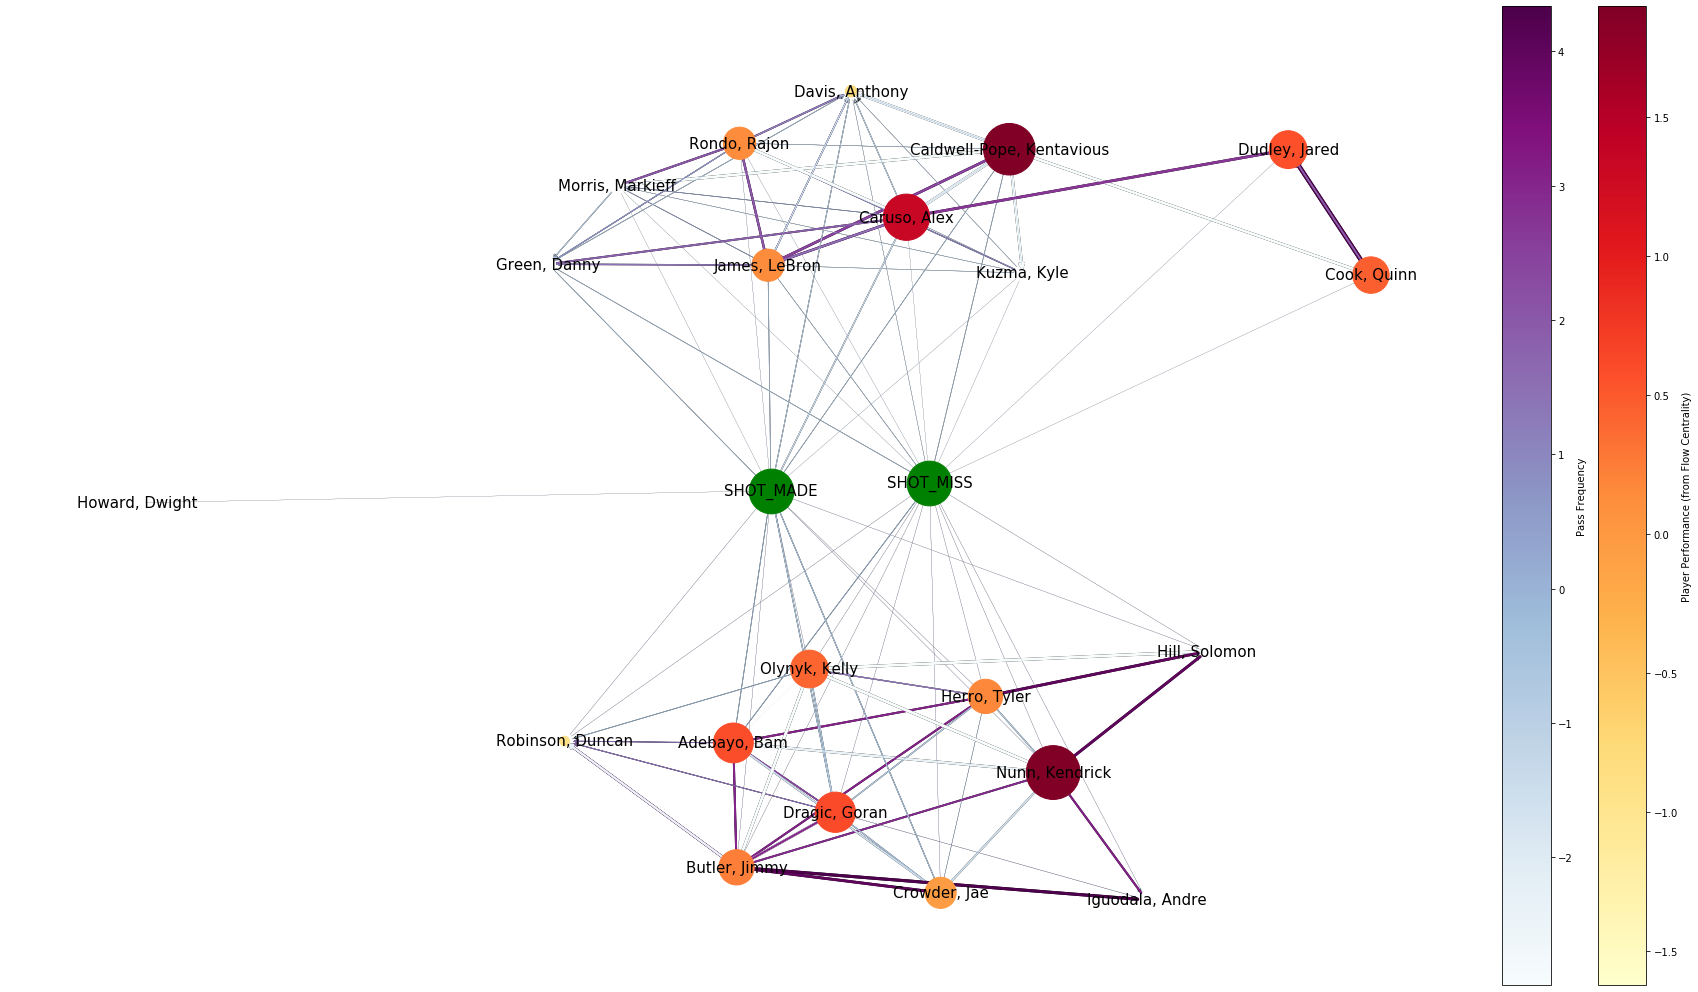

Network for Game 5


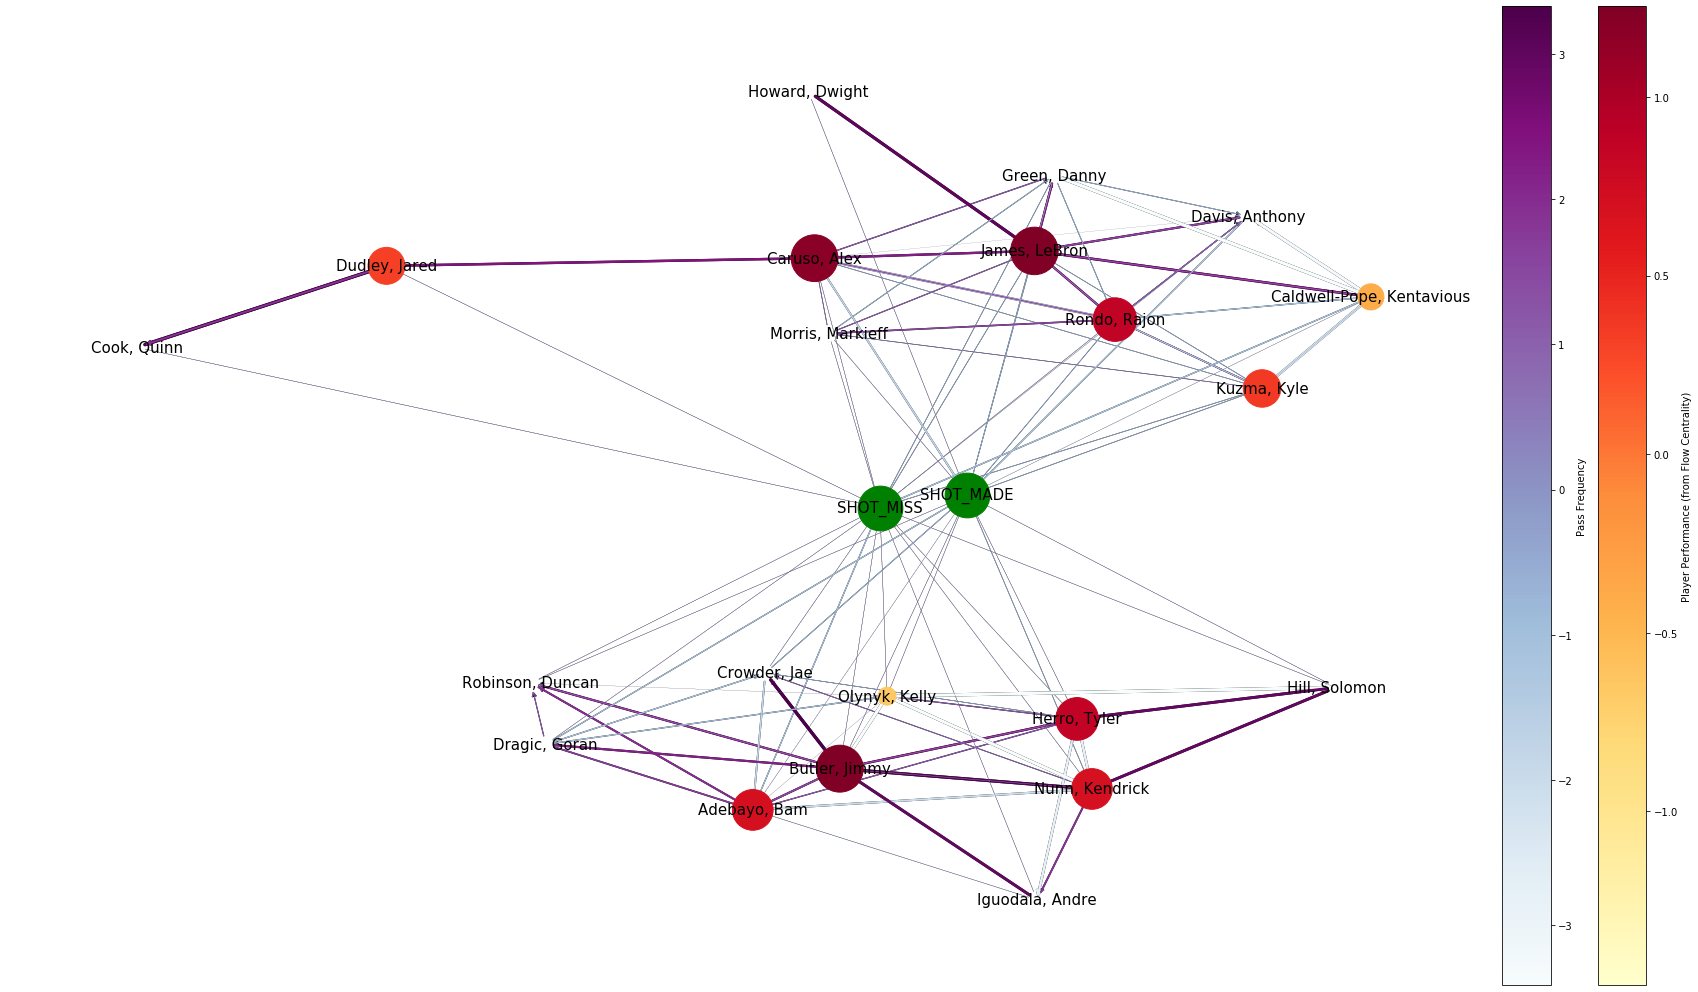

Network for Game 4


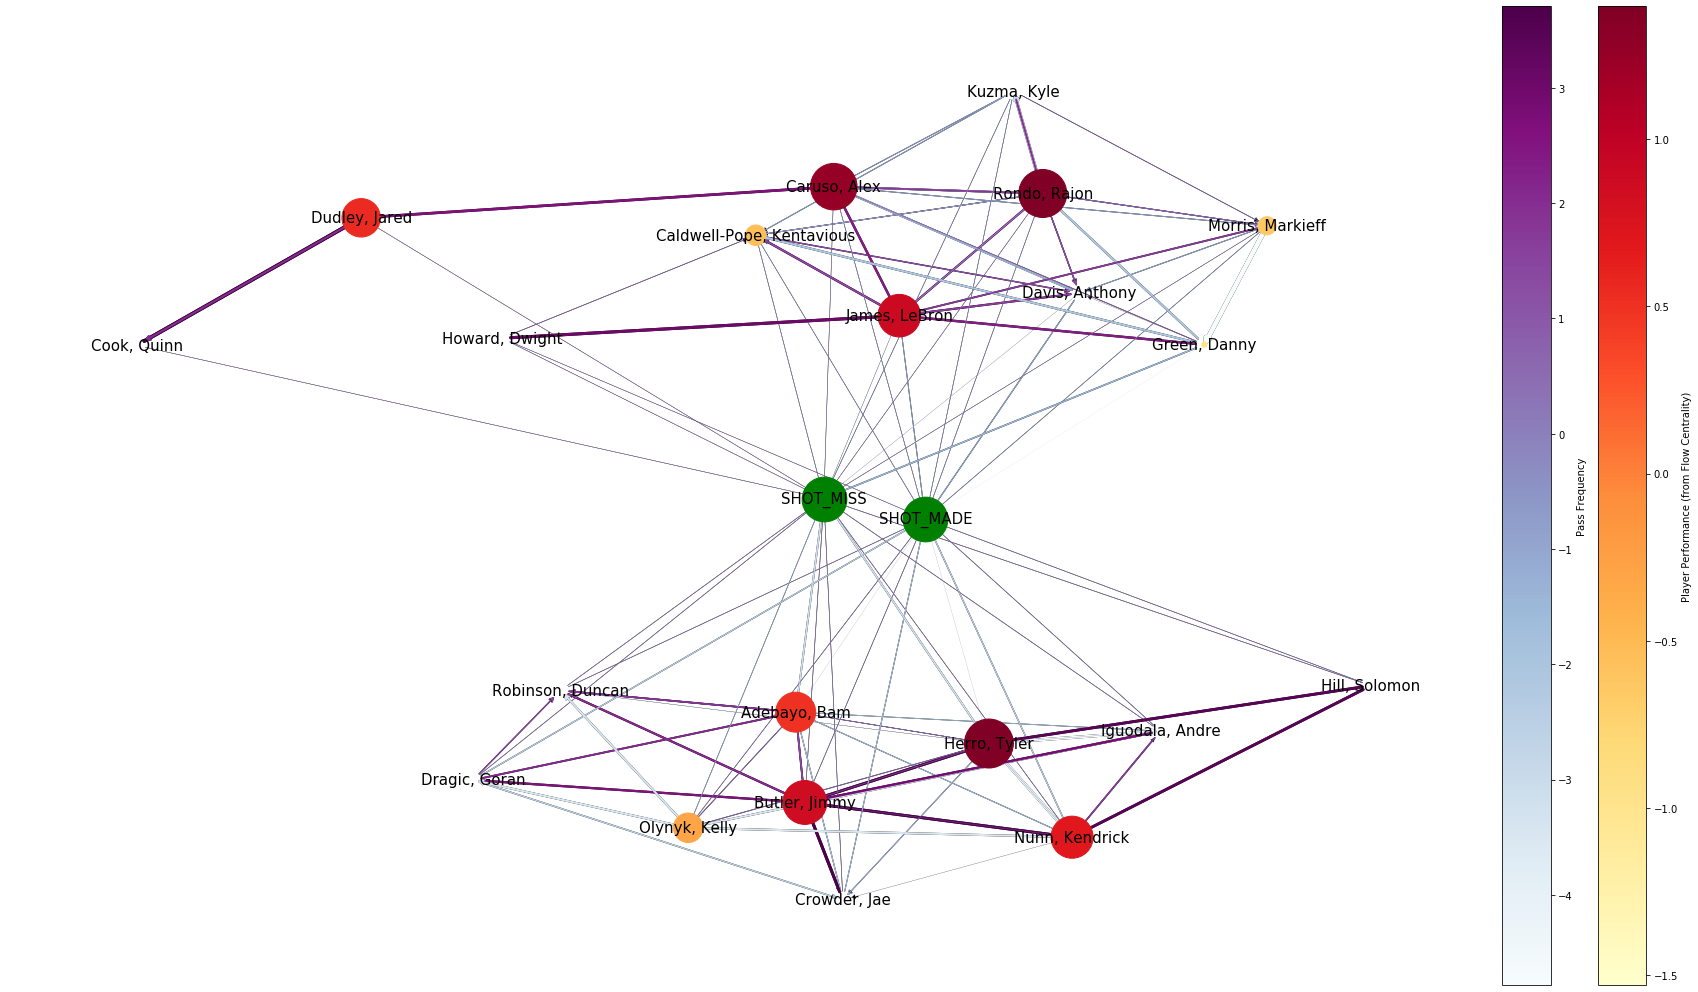

Network for Game 3


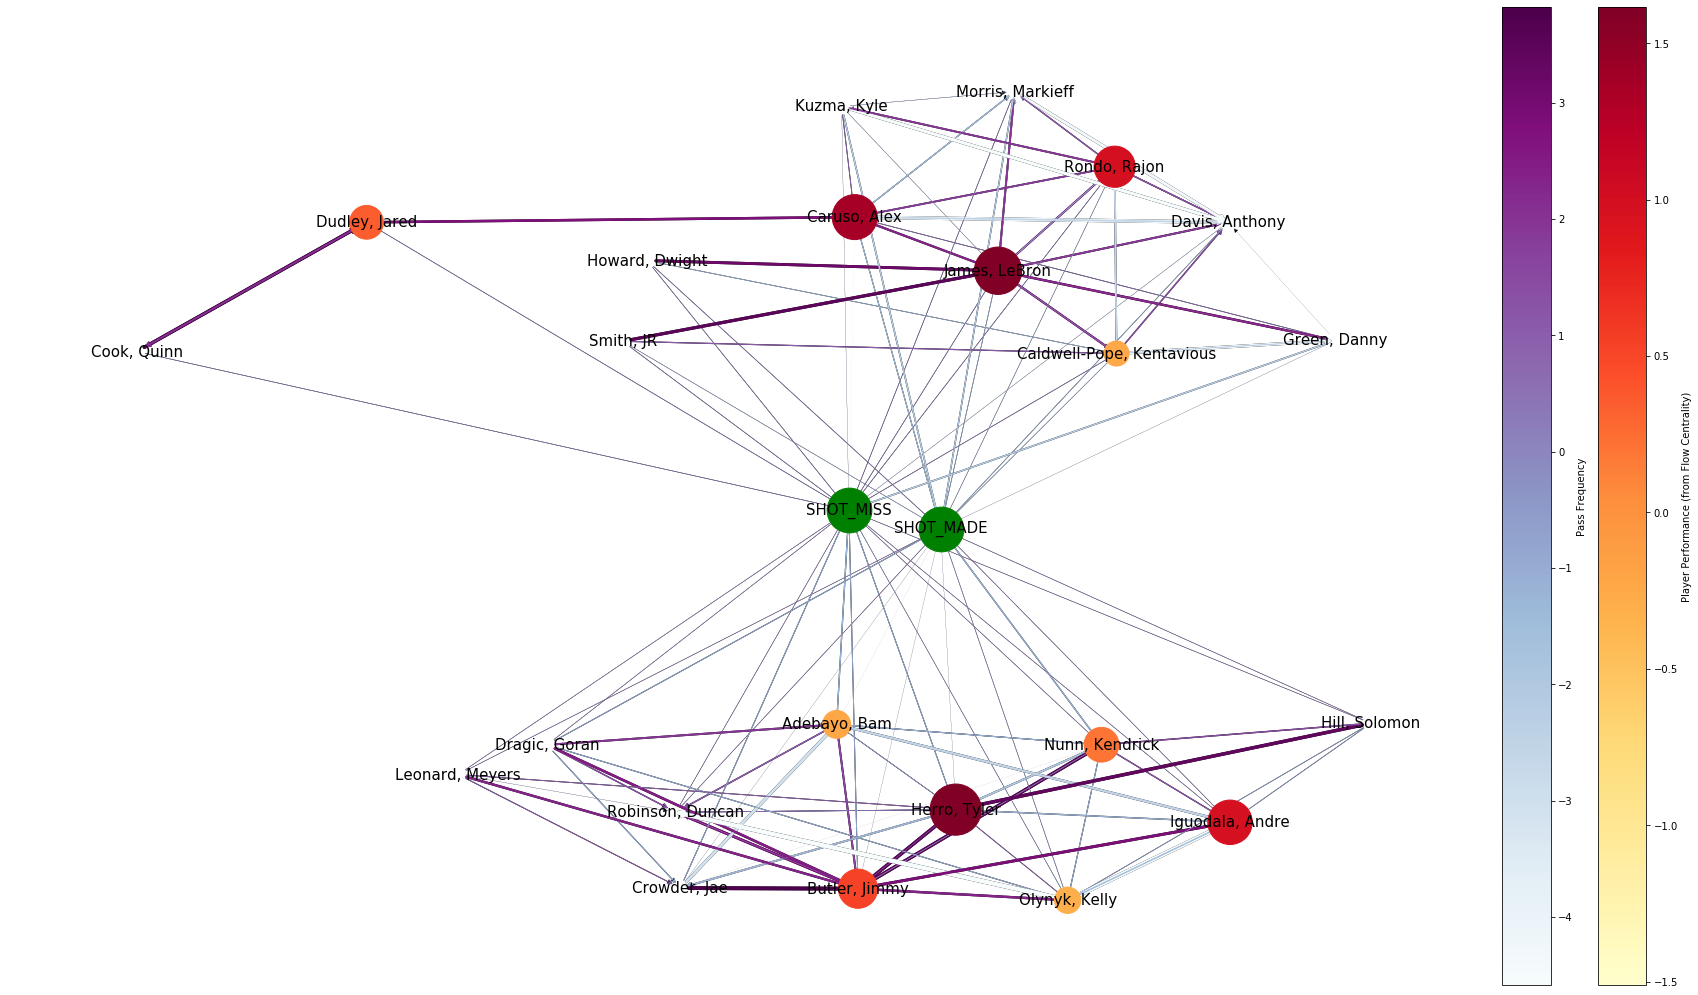

Network for Game 2


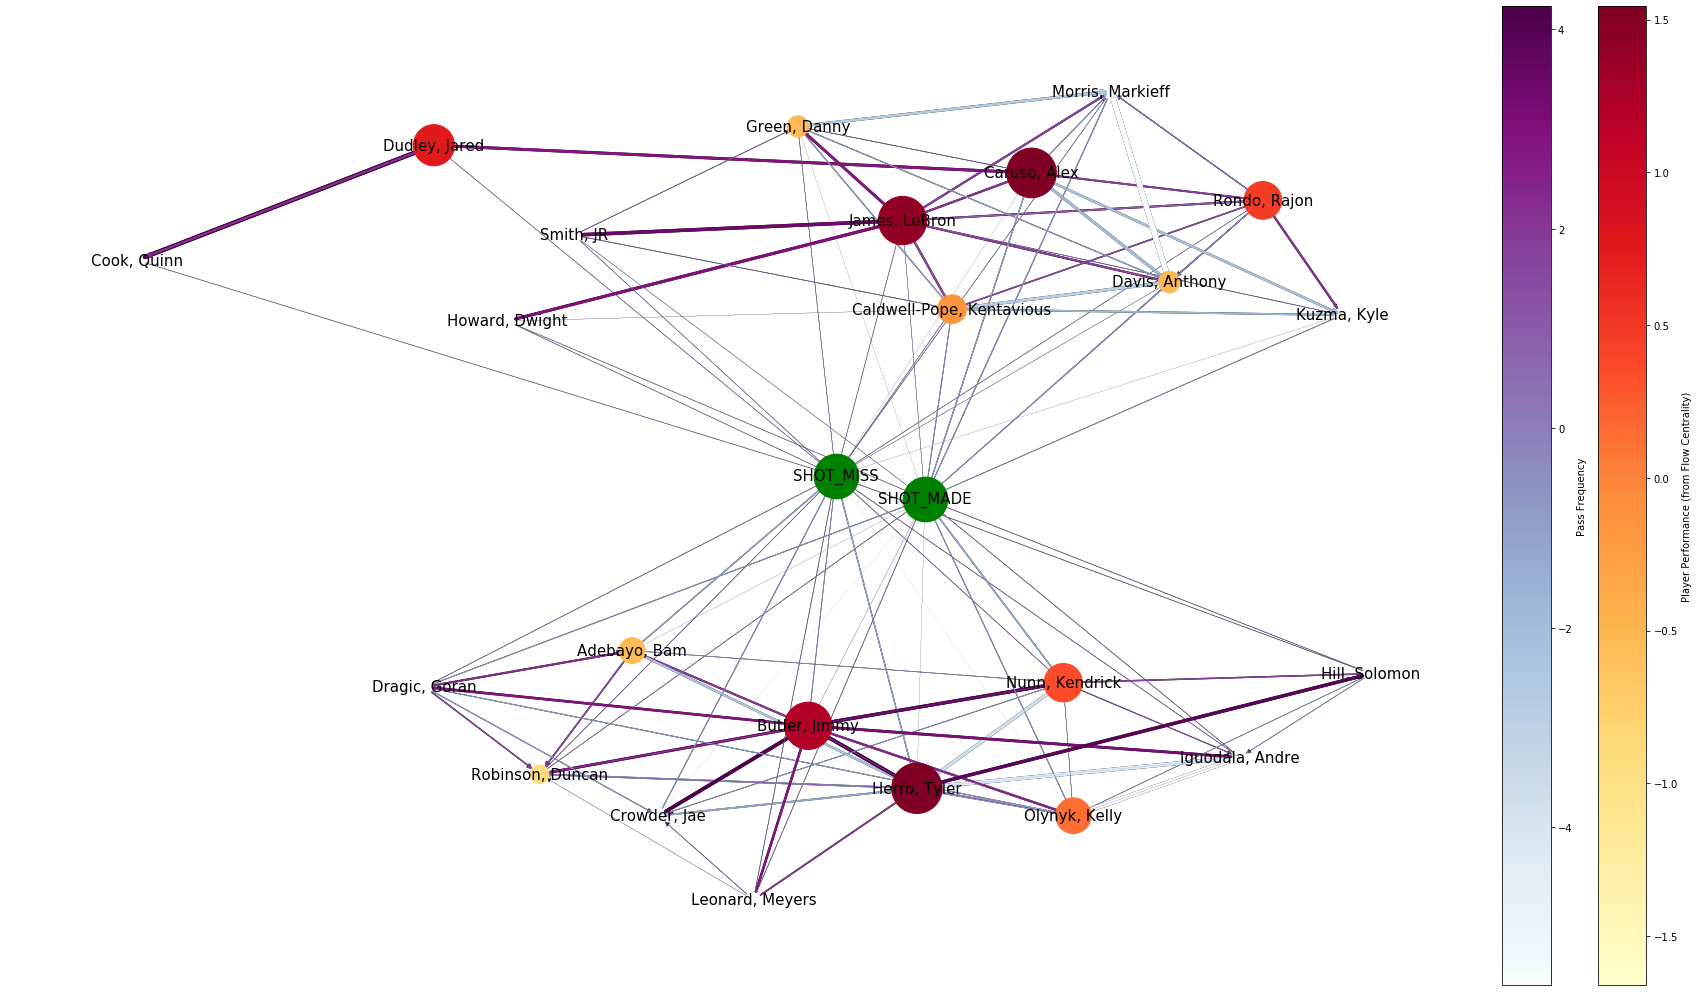

Network for Game 1


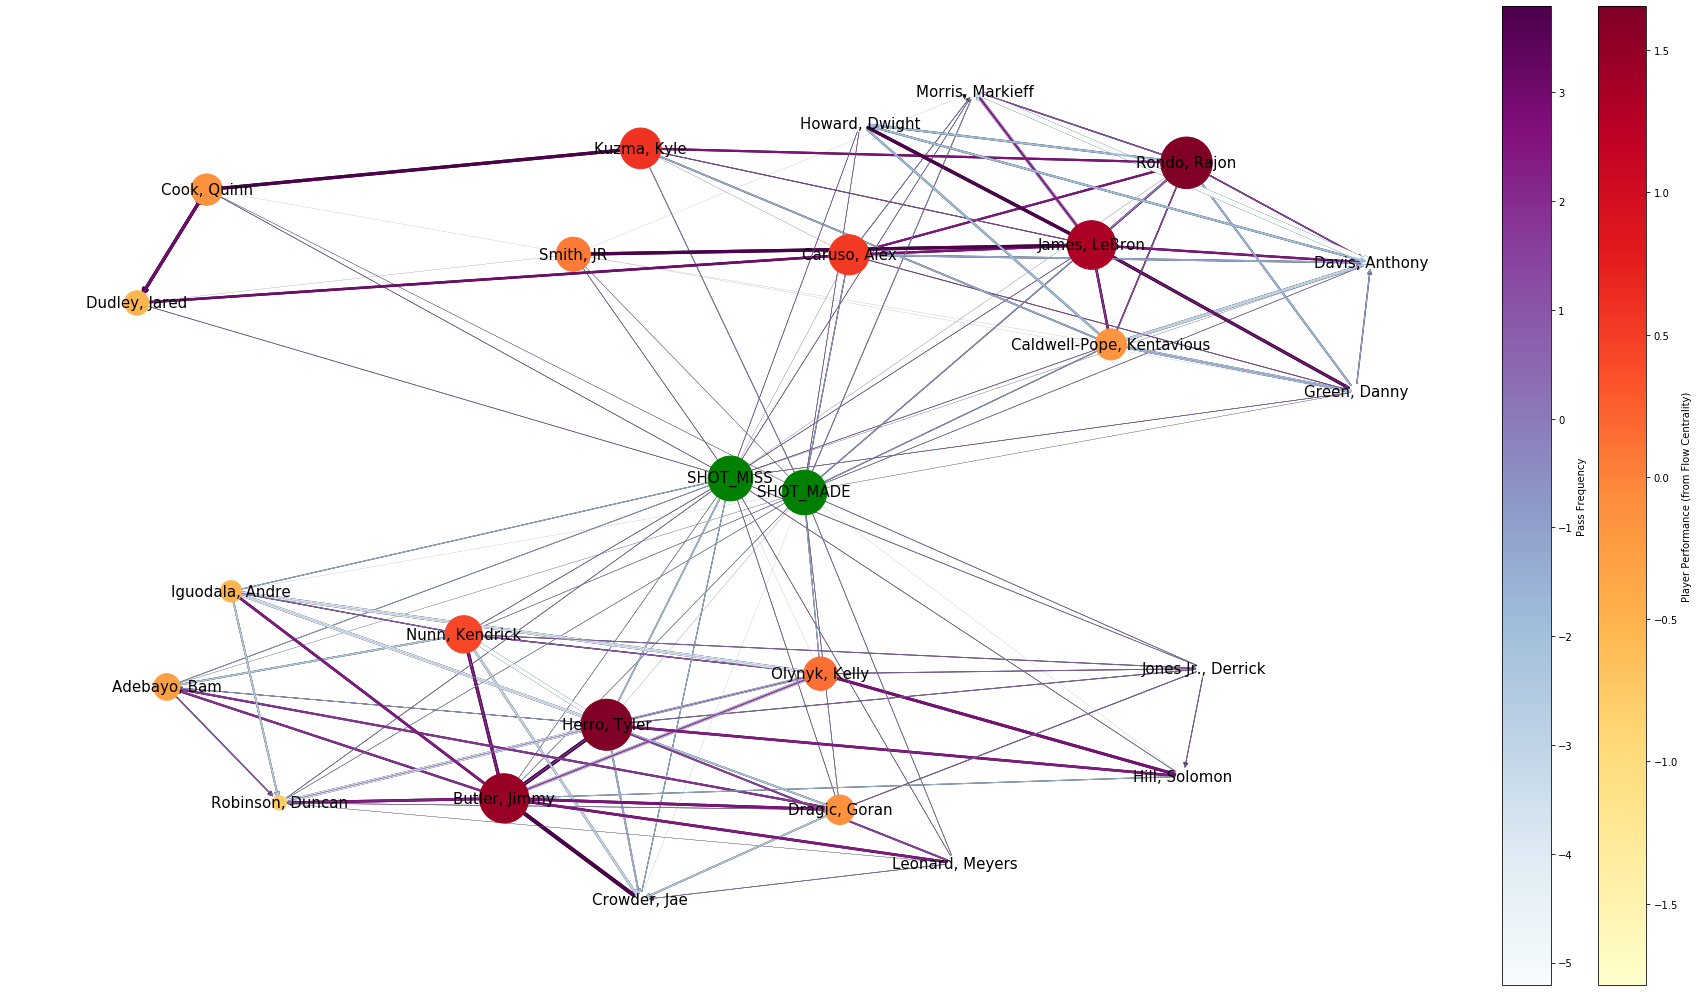

In [5]:
norm_network_dfs = []
centrality_dfs = []
full_networks = []
Gs = []
player_perfs = []

for i in range(1,7):
    print(f"Network for Game {7-i}")
    norm_network_df_curr, centrality_df_curr, full_network_curr, G_curr, player_perf_curr = runFullNetworkPipeline(i, metric='fcen', plot=True)
    norm_network_dfs.append(norm_network_df_curr)
    centrality_dfs.append(centrality_df_curr)
    full_networks.append(full_network_curr)
    Gs.append(G_curr)
    player_perfs.append(player_perf_curr)


The top set of nodes (above the 2 non-player nodes of SHOT_MISS and SHOT_MADE) are the Los Angeles Lakers (team 1) and the bottom set of nodes are the Miami Heat (team 2). The edges for both networks are colored and weighted by the log normalized pass frequencies between players, and the nodes are colored and sized by their log normalized flow centrality.

Although networks give an interesting view in each space, it can be hard to reason something meaningful from them just by looking, but we can see at a quick glance that prominent players like LeBron James for the Lakers and Jimmy Butler/Tyler Herro for the Heat show up in significance. Let's dive a bit deeper to get a more nuanced look into flow centrality.

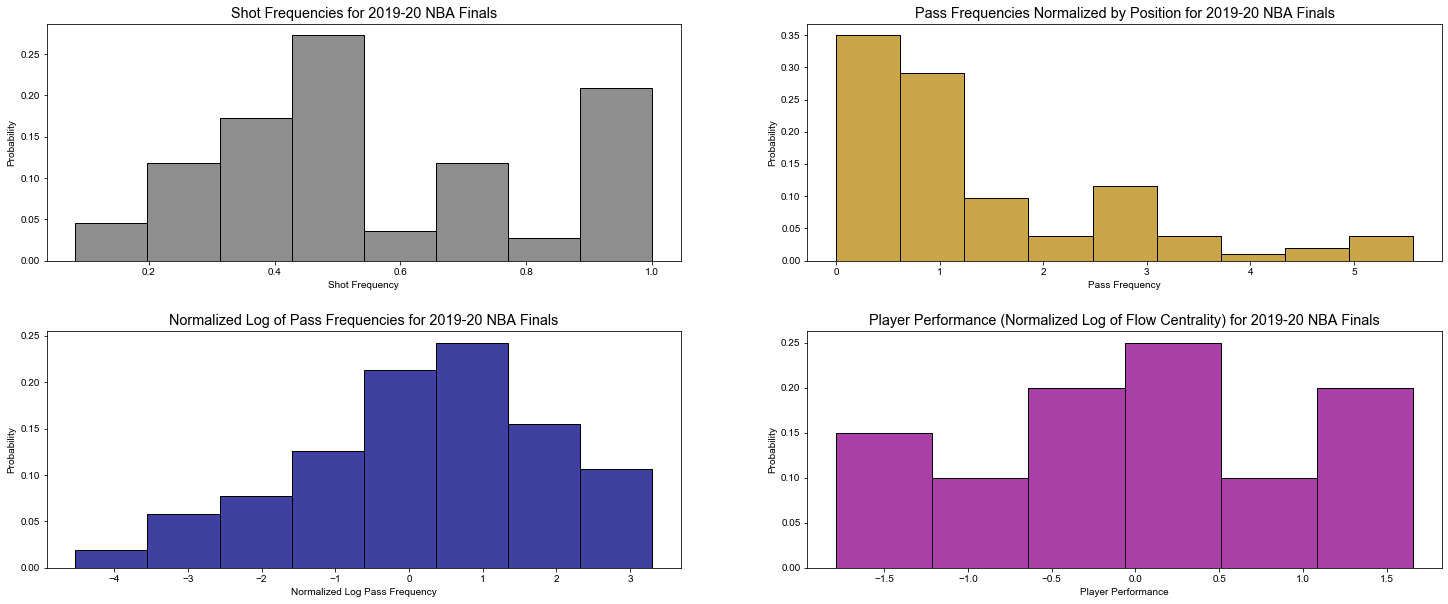

In [6]:
shot_acc = norm_network_dfs[5][norm_network_dfs[5]['TO'] == 'SHOT_MADE']
pass_acc = norm_network_dfs[5][~(norm_network_dfs[5]['TO'] == 'SHOT_MADE')&~(norm_network_dfs[5]['TO'] == 'SHOT_MISS')]
norm_log_pass_acc = norm_network_dfs[5][~(norm_network_dfs[5]['TO'] == 'SHOT_MADE')&~(norm_network_dfs[5]['TO'] == 'SHOT_MISS')]


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(25, 10))
plt.rcParams.update({'font.size': 12})


ax1 = sns.histplot(shot_acc, x="FREQUENCY", stat='probability', color='dimgrey', ax=ax1)
ax2 = sns.histplot(pass_acc, x="FREQUENCY", stat='probability', color="darkgoldenrod", ax=ax2)
ax3 = sns.histplot(norm_log_pass_acc, x="norm_log_FREQUENCY", stat='probability', color='navy', ax=ax3)
ax4 = sns.histplot(centrality_dfs[5], x="player_performance_fcen", stat='probability', color='darkmagenta', ax=ax4)

ax1.set(xlabel='Shot Frequency')
ax1.set_title('Shot Frequencies for 2019-20 NBA Finals')
ax2.set(xlabel='Pass Frequency')
ax2.set_title('Pass Frequencies Normalized by Position for 2019-20 NBA Finals')
ax3.set(xlabel='Normalized Log Pass Frequency')
ax3.set_title('Normalized Log of Pass Frequencies for 2019-20 NBA Finals')
ax4.set(xlabel='Player Performance')
ax4.set_title('Player Performance (Normalized Log of Flow Centrality) for 2019-20 NBA Finals')
plt.subplots_adjust(hspace = 0.3)
custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
ax = sns.set_style("darkgrid", rc=custom_style)
plt.show()

As we can see, even with normalizing the data we still do not have as normal of a distribution. This is likely because we are only looking at the latest game (1 per team). Considering the time constraint for the project, this was deemed acceptable as it is 'normal enough'. Even with a small amount of games, we do find a relatively balanced distribution after normalization even though some positions are naturally going to be 'in between paths' more often like Point Guards.

### 2.2 Assessment of Player Performance

In [7]:
team1_games = {}
team1_perf = {}
team2_games = {}
team2_perf = {}
for i, fn in enumerate(full_networks):
    team1_full, team2_full = getTeamsFromFull(fn)
    team1_games[i+1] = team1_full
    team2_games[i+1] = team2_full

    team1_player_perf = team1_full.groupby('FROM')['player_performance_fcen'].mean().to_dict()
    team2_player_perf = team2_full.groupby('FROM')['player_performance_fcen'].mean().to_dict()
    team1_perf[i+1] = team1_player_perf
    team2_perf[i+1] = team2_player_perf
    
for i in range(1,7):
    team1_perf[i] = dict(sorted(team1_perf[i].items(), key=lambda x: x[1], reverse=True))
    team2_perf[i] = dict(sorted(team2_perf[i].items(), key=lambda x: x[1], reverse=True))
    
team1_perf_df = pd.DataFrame.from_dict(team1_perf[1], orient='index', columns=['1'])
team2_perf_df = pd.DataFrame.from_dict(team2_perf[1], orient='index', columns=['1'])

for i in range(2, len(team1_perf)+1):
    curr_df = pd.DataFrame.from_dict(team1_perf[i], orient='index', columns=[f'{i}'])
    team1_perf_df = team1_perf_df.join(curr_df, rsuffix=f'{i}', how='left')
    
for i in range(2, len(team2_perf)+1):
    curr_df = pd.DataFrame.from_dict(team2_perf[i], orient='index', columns=[f'{i}'])
    team2_perf_df = team2_perf_df.join(curr_df, rsuffix=f'{i}', how='left')

team1_outcome = [1, 1, 0, 1, 0, 1]
team2_outcome = [0, 0, 1, 0, 1, 0]
team1_perf_df = team1_perf_df.stack().reset_index().rename(columns={'level_0':'Player', 'level_1':'Game', 0:'Performance (Flow Centrality)'})
team1_perf_df['Game'] = team1_perf_df['Game'].astype(int)

one_outcome = pd.DataFrame({"Outcome": team1_outcome,
                          "Game": [1, 2, 3, 4, 5, 6]})
team1_perf_df = team1_perf_df.merge(one_outcome, on=['Game'], how='left')

team2_perf_df = team2_perf_df.stack().reset_index().rename(columns={'level_0':'Player', 'level_1':'Game', 0:'Performance (Flow Centrality)'})
team2_perf_df['Game'] = team2_perf_df['Game'].astype(int)

two_outcome = pd.DataFrame({"Outcome": team2_outcome,
                          "Game": [1, 2, 3, 4, 5, 6]})
team2_perf_df = team2_perf_df.merge(two_outcome, on=['Game'], how='left')

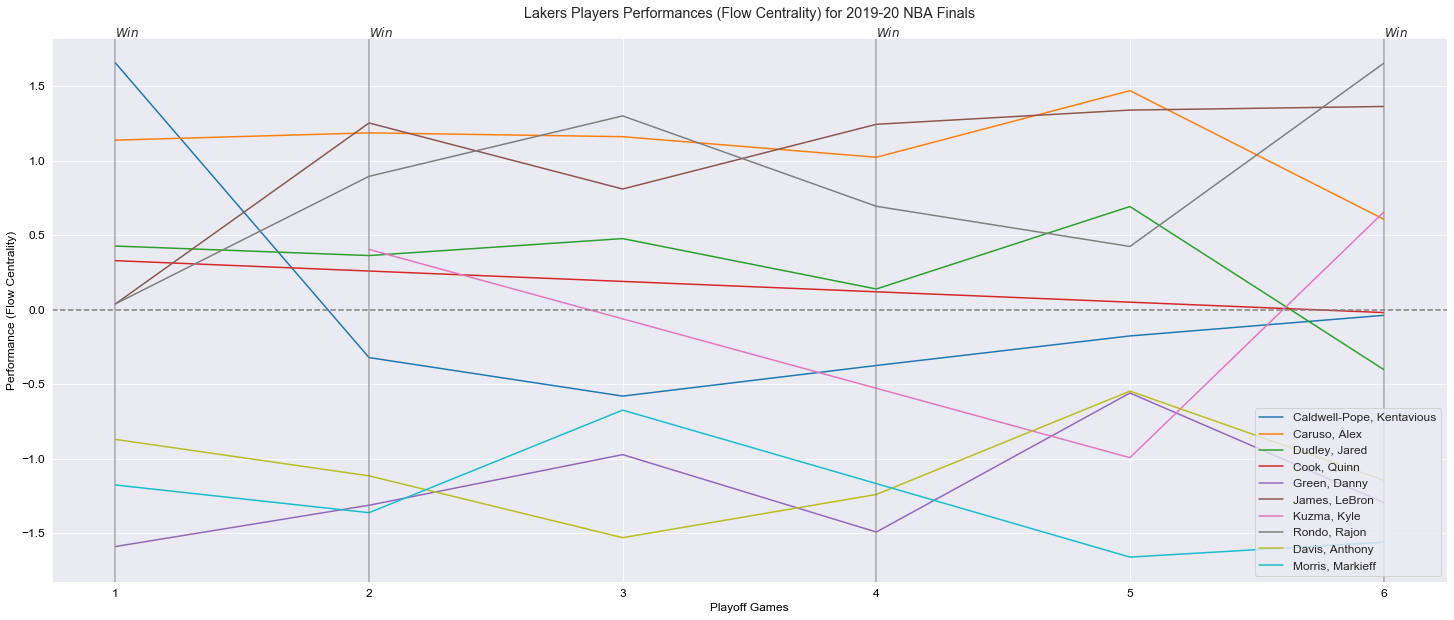

In [8]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.rcParams.update({'font.size': 12})
ax = sns.lineplot(data=team1_perf_df, x='Game', y='Performance (Flow Centrality)', hue='Player')

ax.axvline(1, color='gray', lw=2, alpha=0.5)
ax.axvline(2, color='gray', lw=2, alpha=0.5)
ax.axvline(4, color='gray', lw=2, alpha=0.5)
ax.axvline(6, color='gray', lw=2, alpha=0.5)

ax.text(1, 1.83, r'$Win$')
ax.text(2, 1.83, r'$Win$')
ax.text(4, 1.83, r'$Win$')
ax.text(6, 1.83, r'$Win$')

ax.axhline(0, color="gray", linestyle ="--")
        
ax.set(xlabel='Playoff Games')
ax.set_title(f'{team1} Players Performances (Flow Centrality) for 2019-20 NBA Finals', pad=20)
ax.legend(loc='lower right')
custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
ax = sns.set_style("darkgrid", rc=custom_style)
plt.show()

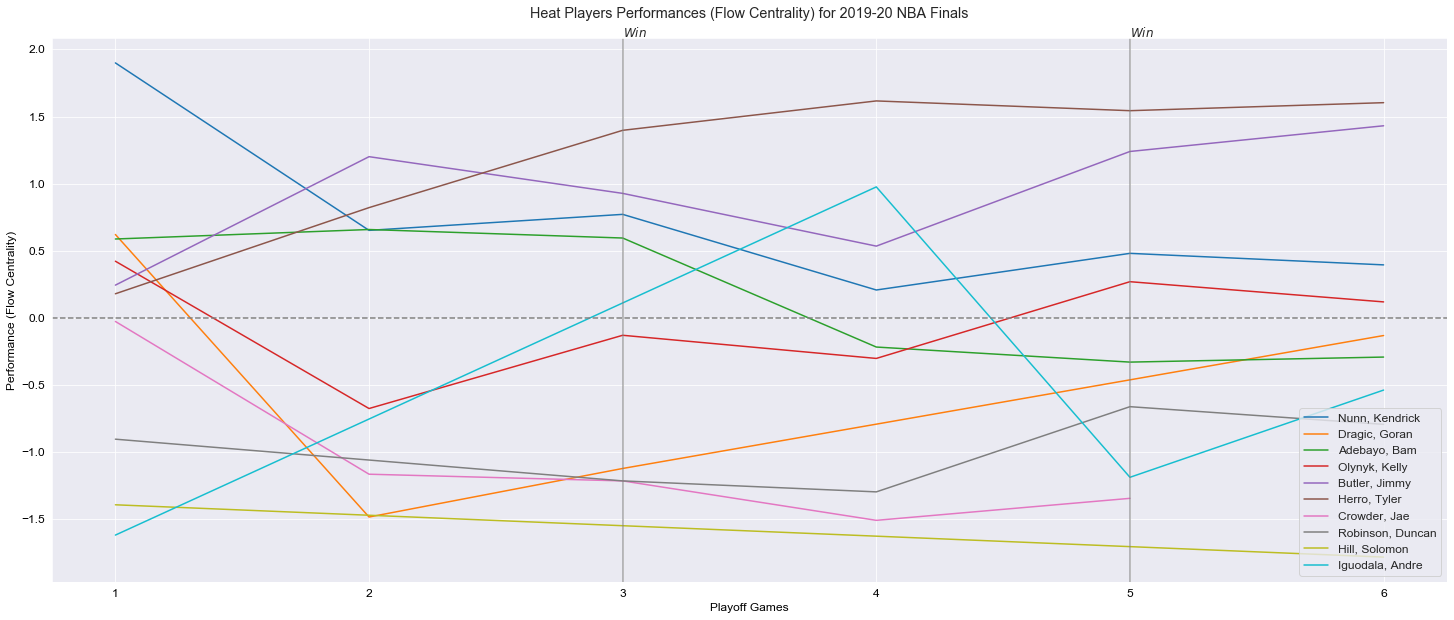

In [9]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.rcParams.update({'font.size': 12})
ax = sns.lineplot(data=team2_perf_df, x='Game', y='Performance (Flow Centrality)', hue='Player')

ax.axvline(3, color='gray', lw=2, alpha=0.5)
ax.axvline(5, color='gray', lw=2, alpha=0.5)

ax.axhline(0, color="gray", linestyle ="--")

ax.text(3, 2.09, r'$Win$')
ax.text(5, 2.09, r'$Win$')
        
ax.set(xlabel='Playoff Games')
ax.set_title(f'{team2} Players Performances (Flow Centrality) for 2019-20 NBA Finals', pad=20)
ax.legend(loc='lower right')
custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
ax = sns.set_style("darkgrid", rc=custom_style)
plt.show()

When we plot the player performance from flow centrality across the 6 games, we find some more interesting aspects of the metric. For the Miami Heat, we do see Jimmy Butler and Tyler Herro at the top as we would expect with dips in their performance occurring with Miami losses. We also see clear gaps in flow centrality: namely, how Anthony Davis is rated consistently in the negative for the Lakers for all games even though he was a significant performer alongside Lebron James. Other players are showing up at the top as well, even though they are not commonly top performers in a game. Although this is by no means a rigorous test of flow centrality for basketball as it is only 6 NBA Finals games, I found flow centrality to not be that impactful of a metric for basketball games. 

Visualizing the metric in this way prompted me to rethink assumptions of the key differences between soccer and basketball. In soccer, a large amount of time can pass before a player shoots the ball which leads to majority of the game relying on passing. In basketball, it is common for each play to end with some type of attempt at scoring the ball. This is an obvious but important difference, because in basketball there is a frequent and rapid evaluation of performance by one's team. If a player gets passed a ball and makes a three-pointer, they are likely to receive the ball again next play and vice-versa. The 'hot' player would be more likely to take more shots and the 'cold' ones would be expected to shift strategy to cater to the one doing well. This 'rich get richer' model of basketball games is not going to be captured as well with betweenness centrality or flow centrality for networks as it mainly tries to find nodes in between paths. Alongside this, there are also multiple short paths that would occur to shooting the ball in basketball due to smaller court/field size and much less players passing the ball at the given moment and this could cause issues for betweenness centrality.

Due to this, I propose using a different set of network analysis metrics, Hubs & Authorities, to model this dynamic in basketball. I denote this metric to be 'flow dominance'.

## 3. Network Modeling with Flow Dominance

### 3.1 Hubs & Authorities

$\displaystyle{e^A = \sum_{i=1}^{k} e^{\lambda_{i}}\mu_{i}\mu_{i}^T}$

According to Stanford NLP Group, "This approach stems from a particular insight into the creation of web pages, that there are two primary kinds of web pages useful as results for broad-topic searches. By a broad topic search, we mean an informational query such as "I wish to learn about leukemia". There are authoritative sources of information on the topic; in this case, the National Cancer Institute's page on leukemia would be such a page. We will call such page’s authorities; in the computation we are about to describe, they are the pages that will emerge with high authority scores."

On the other hand, there are many pages on the Web that are hand-compiled lists of links to authoritative web pages on a specific topic. These hub pages are not in themselves authoritative sources of topic-specific information, but rather compilations that someone with an interest in the topic has spent time putting together.

A key assumption here is that nodes that have incoming edges from good hubs are good authorities, and nodes that have outgoing edges to good authorities are good hubs. For basketball, this seems to model our 'rich get richer' phenomena well:

Player X starts doing well -> Player X gets passed the ball more often (becomes a good authority) -> Strategy shifts around Player X -> Player X has more people to pass to by virtue of having the ball more (good hub)

If at any point Player X starts missing more then the flow goes in the direction of having the ball less and having less people to pass to (low authority and hub). So, an ideal player would be both: a good hub and authority. In my study, I multiply each node's hub and authority score and then apply a Yeo-Johnson Power Transformation, and this becomes flow dominance.


Network for Game 6


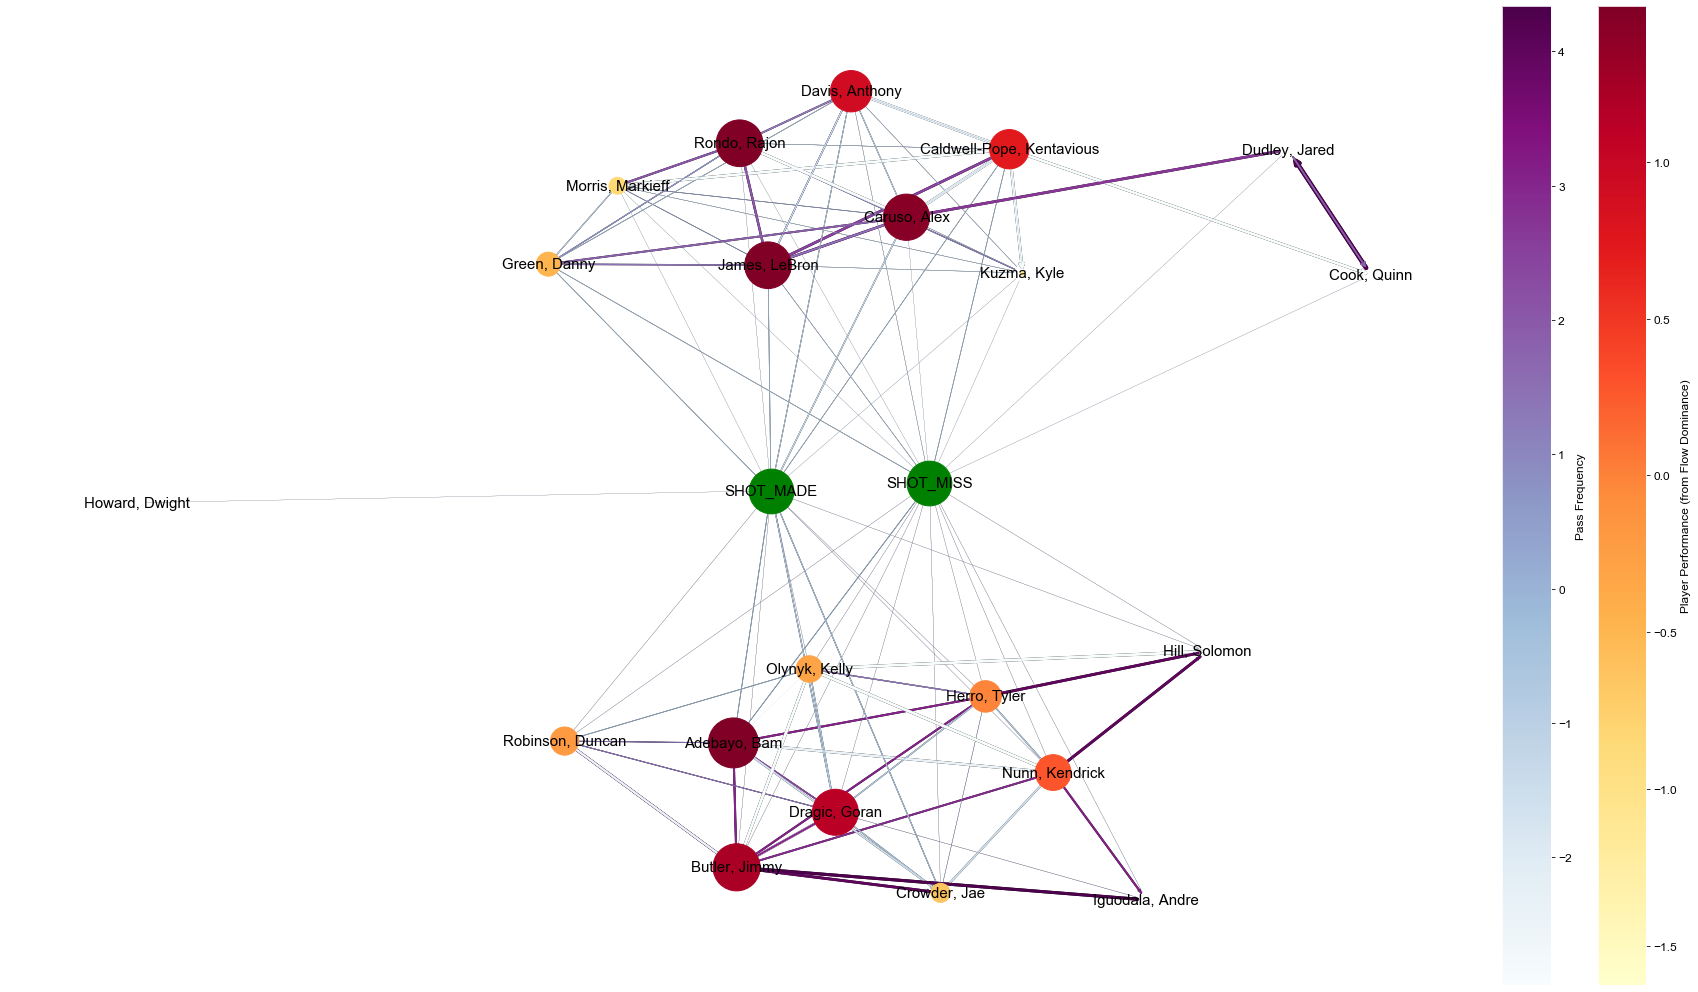

Network for Game 5


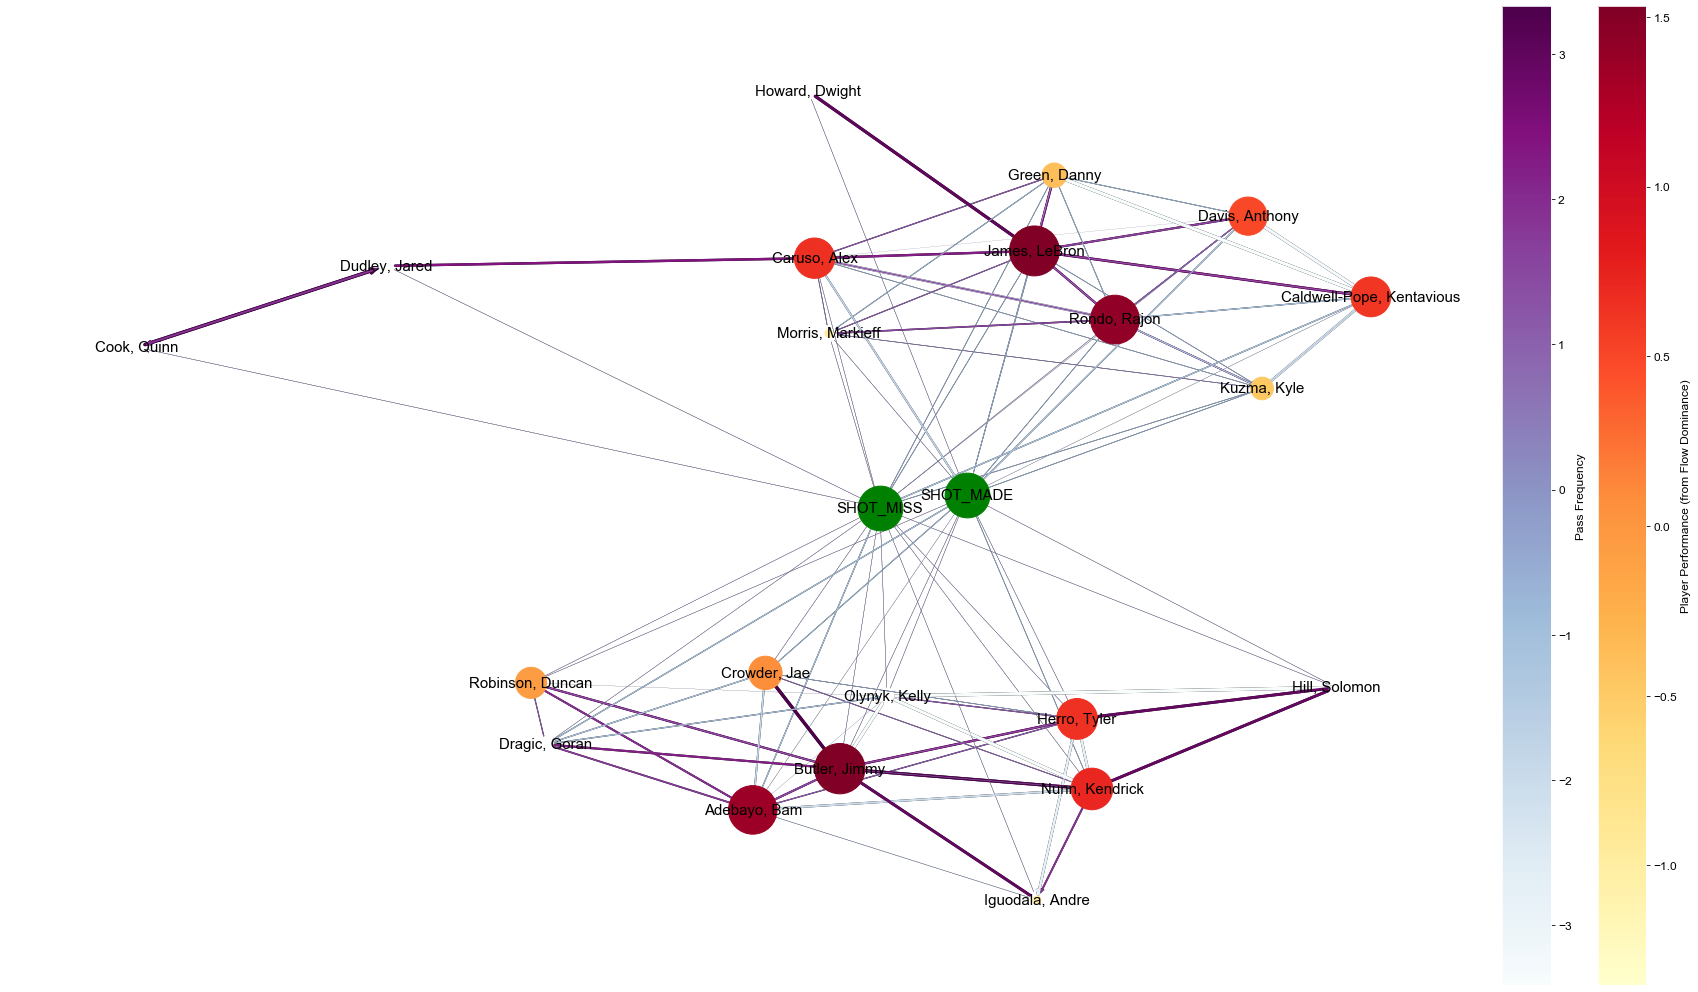

Network for Game 4


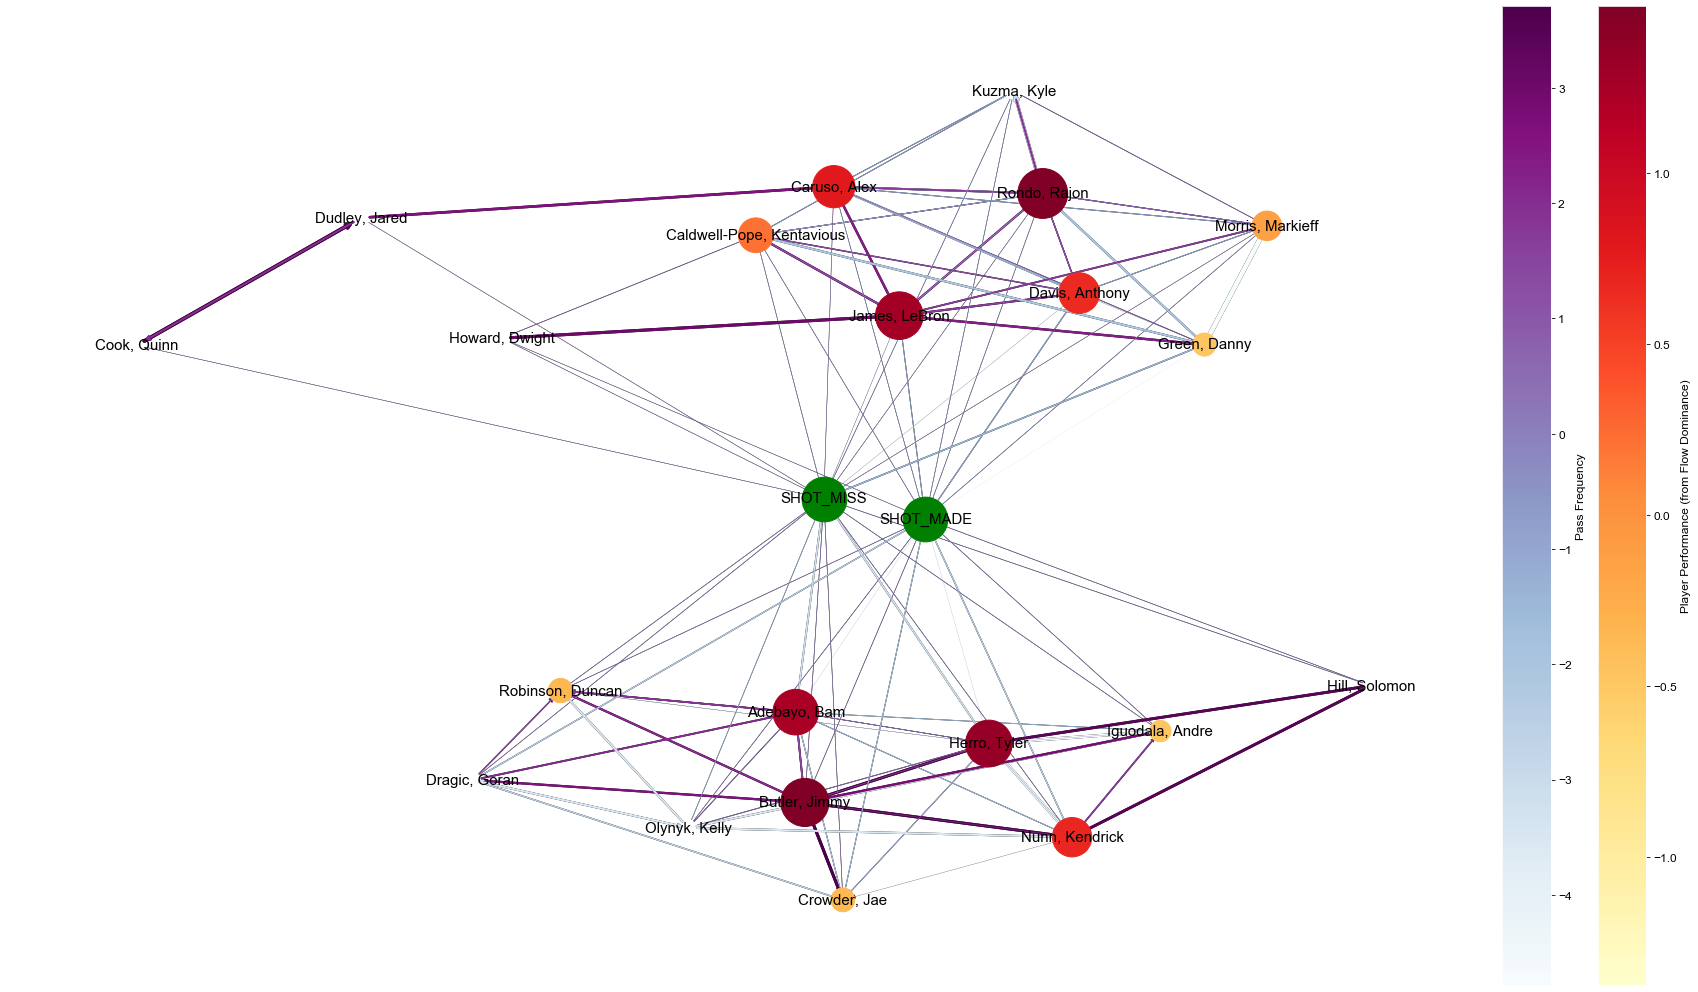

Network for Game 3


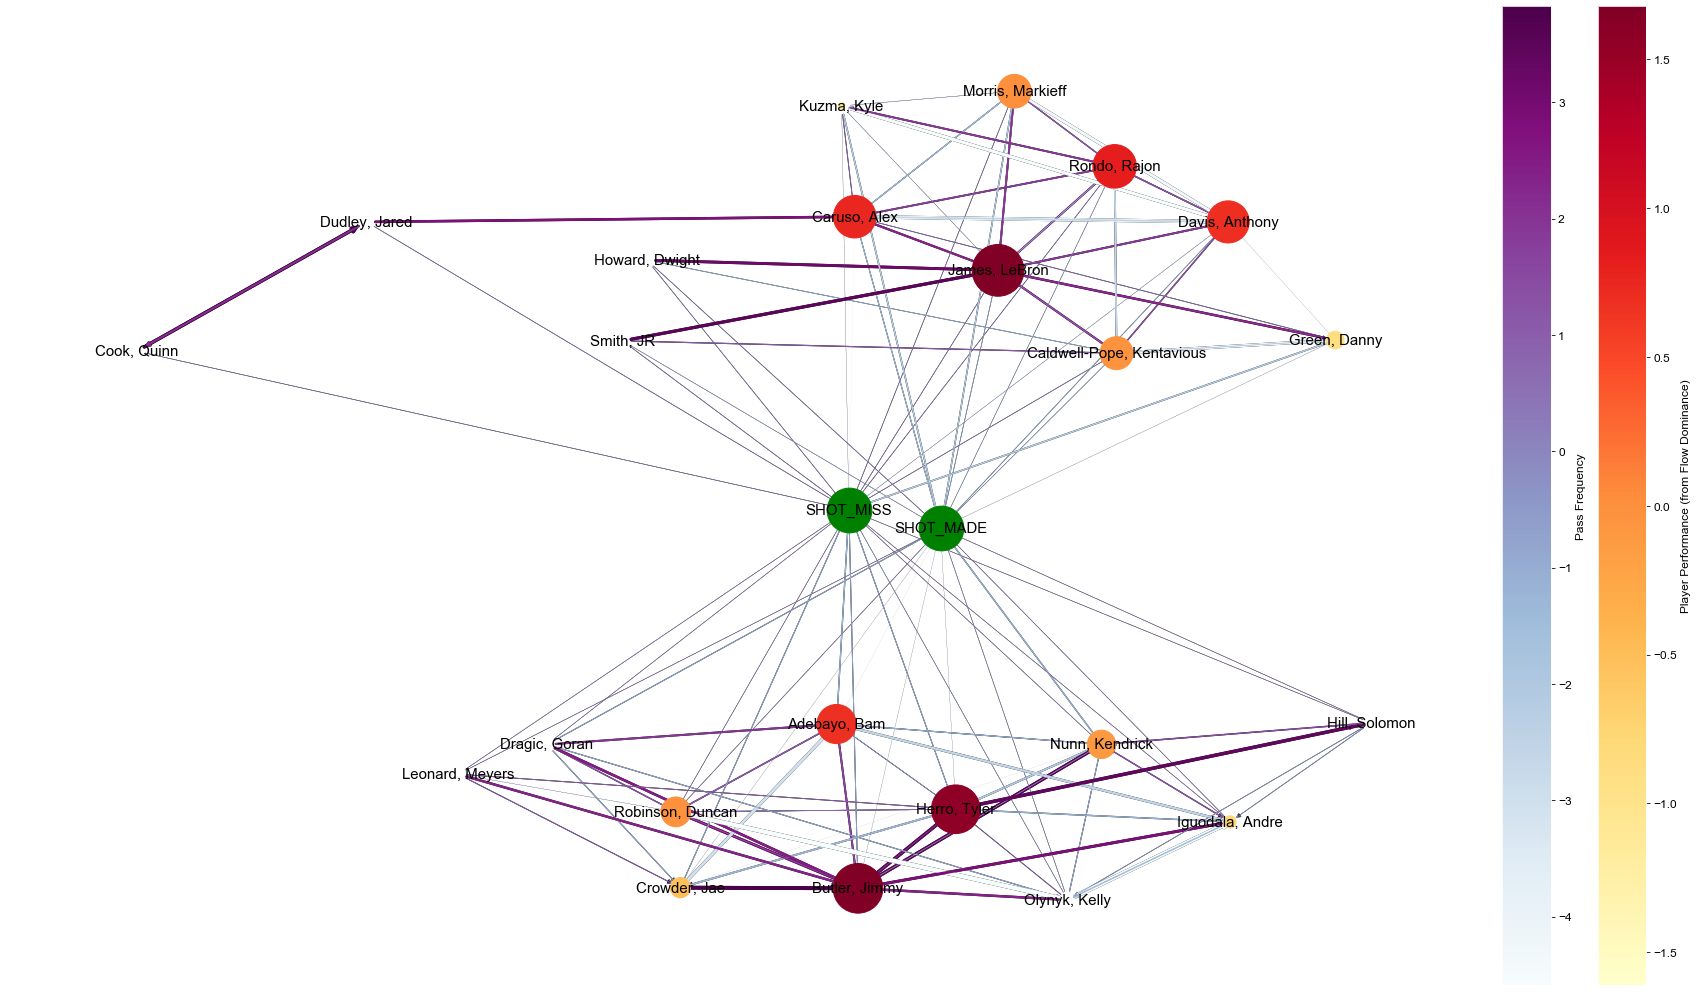

Network for Game 2


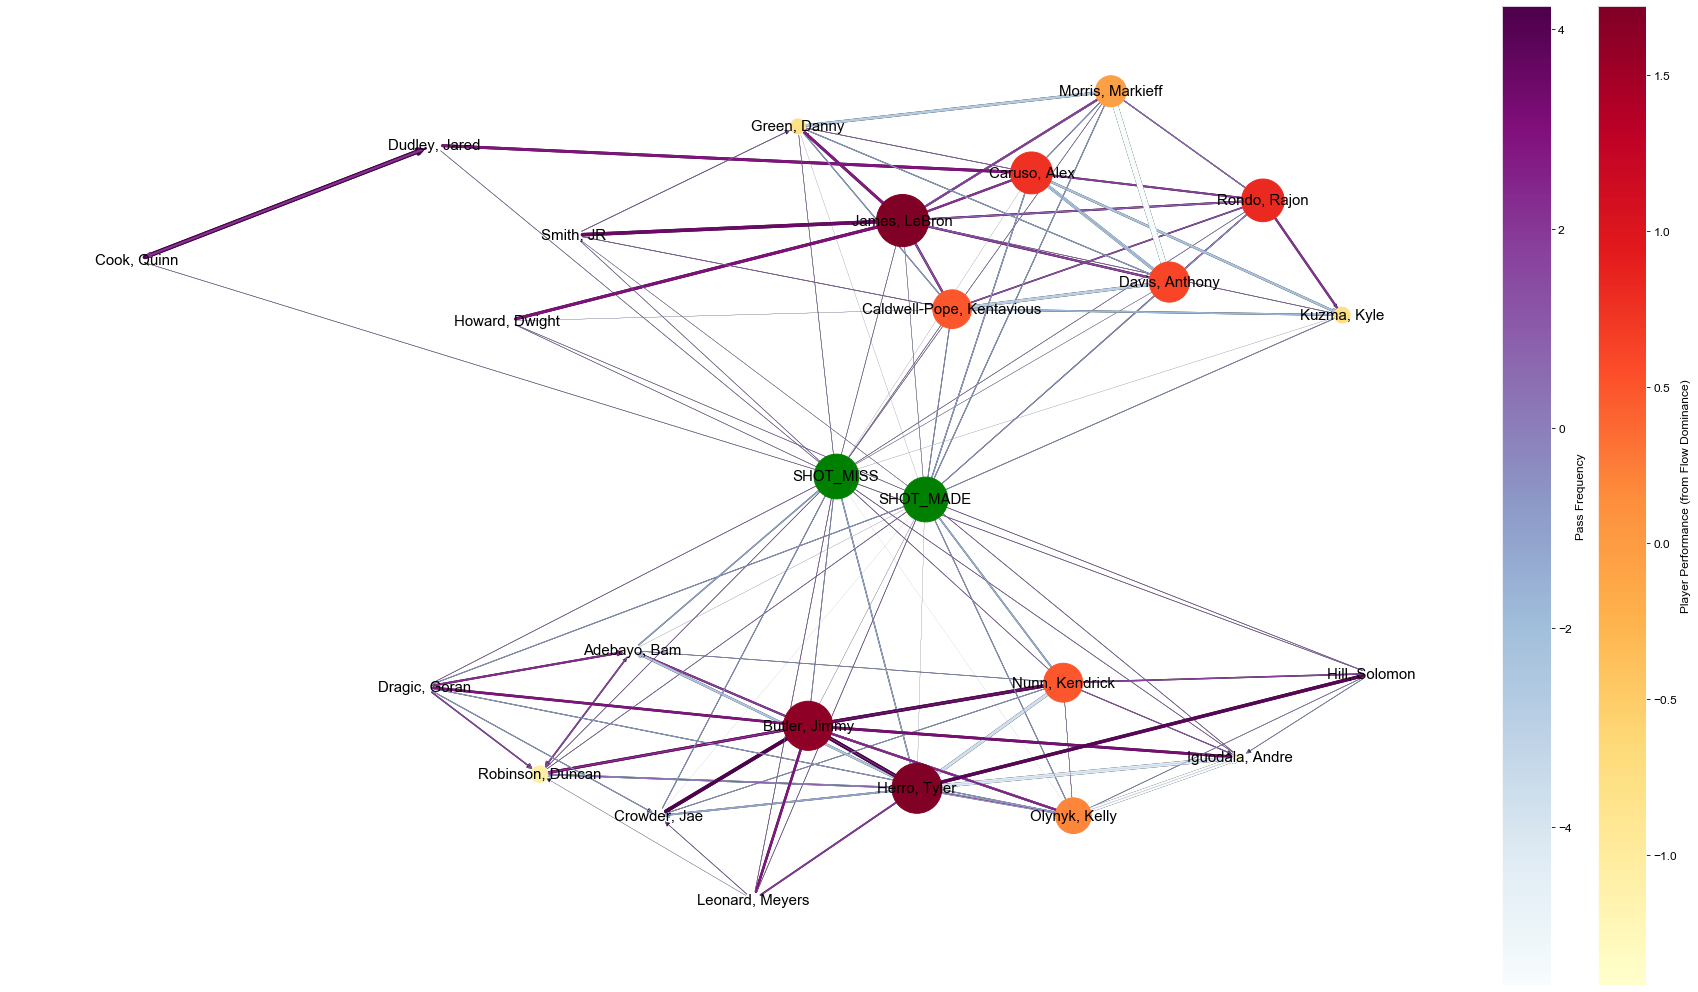

Network for Game 1


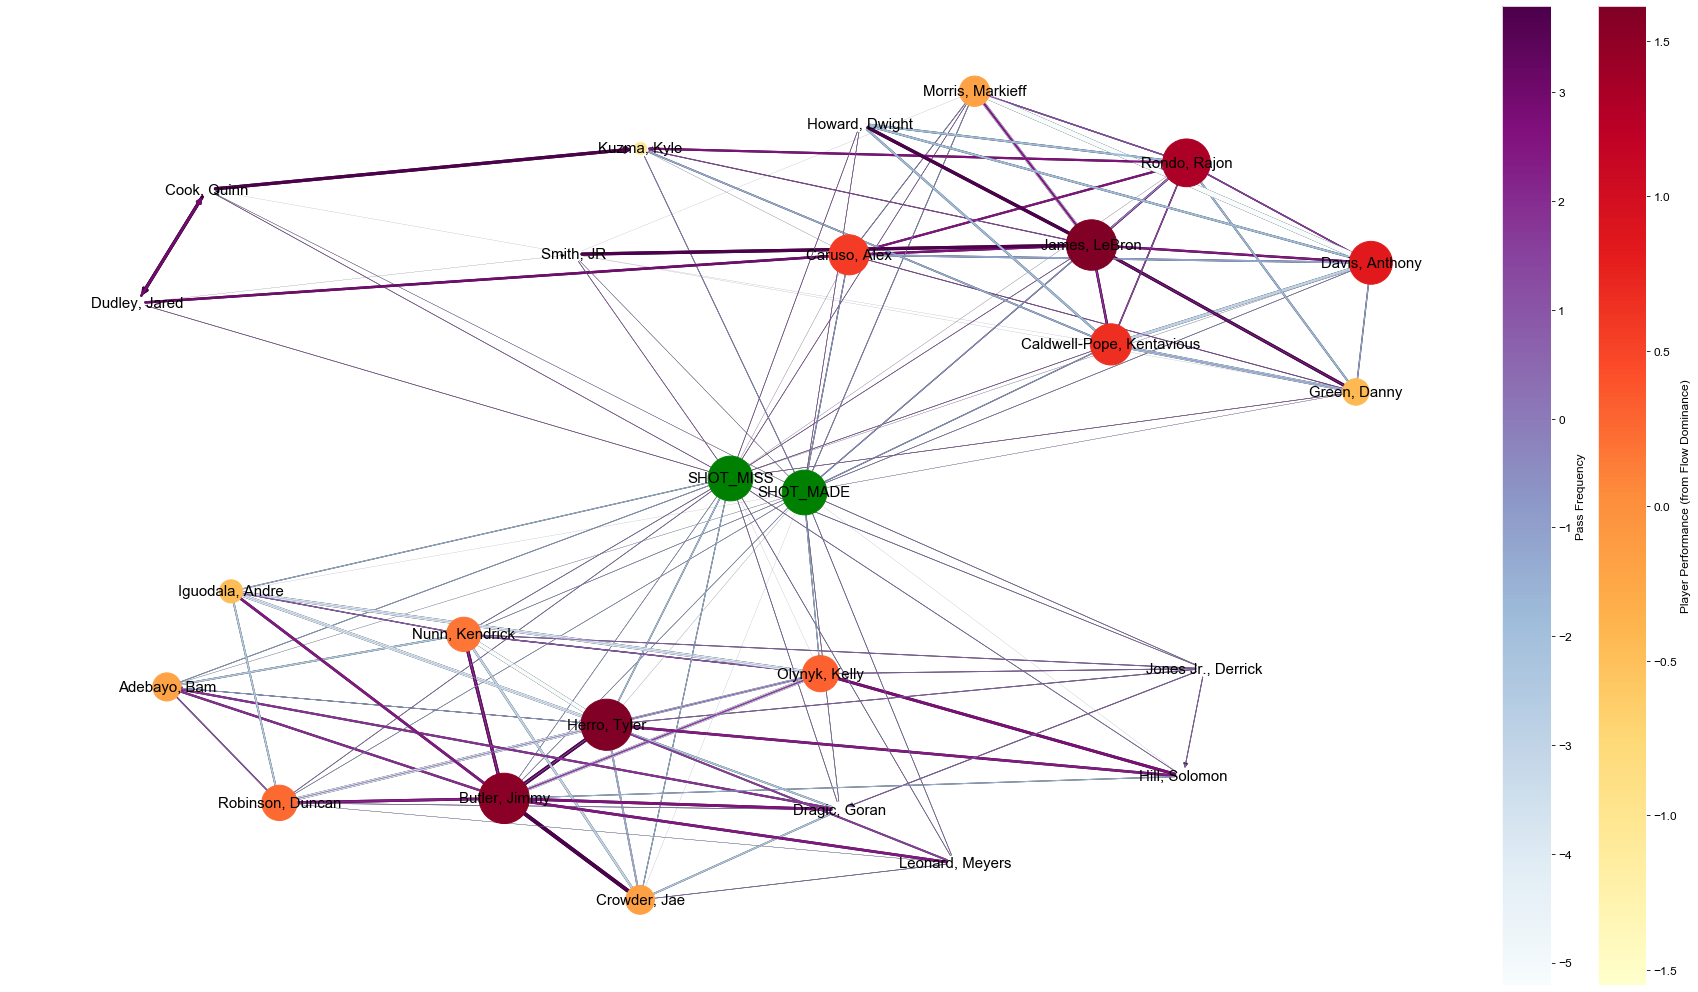

In [10]:
norm_network_ha_dfs = []
centrality_ha_dfs = []
full_networks_ha = []
Gs_ha = []
player_perfs_ha = []

for i in range(1,7):
    print(f"Network for Game {7-i}")
    norm_network_df_curr, centrality_df_curr, full_network_curr, G_curr, player_perf_curr = runFullNetworkPipeline(i, metric='fdom', plot=True)
    norm_network_ha_dfs.append(norm_network_df_curr)
    centrality_ha_dfs.append(centrality_df_curr)
    full_networks_ha.append(full_network_curr)
    Gs_ha.append(G_curr)
    player_perfs_ha.append(player_perf_curr)

At first glance, this metric feels a lot more balanced and representative of what one would picture for these two teams. Players who are more immediate supports for the A-listers on each team take on the yellow/orange color with a medium size, and the dominant players have almost a gravitational pull on their own network (as you would expect LeBron to have on the Lakers). Another thing to note is that you even see players like Duncan Robinson and Jae Crowder for the Heat show up in this metric (for Game 1) more than using flow centrality. Jae had 12 points with 4 rebounds and Duncan had 4 rebounds and 0 points/assists. This is interesting because flow dominance appears to pick up on more than just whether a player is scoring a lot. In a game, players use multiple dimensions to account for whether their teammate is performing well or not, and this metric seems to pick up on that.

In [11]:
team1_games_ha = {}
team1_perf_ha = {}
team2_games_ha = {}
team2_perf_ha = {}
for i, fn in enumerate(full_networks_ha):
    team1_full_ha, team2_full_ha = getTeamsFromFull(fn)
    team1_games_ha[i+1] = team1_full_ha
    team2_games_ha[i+1] = team2_full_ha

    team1_player_perf_ha = team1_full_ha.groupby('FROM')['player_performance_fdom'].mean().to_dict()
    team2_player_perf_ha = team2_full_ha.groupby('FROM')['player_performance_fdom'].mean().to_dict()
    team1_perf_ha[i+1] = team1_player_perf_ha
    team2_perf_ha[i+1] = team2_player_perf_ha
    
for i in range(1,7):
    team1_perf_ha[i] = dict(sorted(team1_perf_ha[i].items(), key=lambda x: x[1], reverse=True))
    team2_perf_ha[i] = dict(sorted(team2_perf_ha[i].items(), key=lambda x: x[1], reverse=True))
    
team1_perf_ha_df = pd.DataFrame.from_dict(team1_perf_ha[1], orient='index', columns=['1'])
team2_perf_ha_df = pd.DataFrame.from_dict(team2_perf_ha[1], orient='index', columns=['1'])

for i in range(2, len(team1_perf_ha)+1):
    curr_df = pd.DataFrame.from_dict(team1_perf_ha[i], orient='index', columns=[f'{i}'])
    team1_perf_ha_df = team1_perf_ha_df.join(curr_df, rsuffix=f'{i}', how='left')
    
for i in range(2, len(team2_perf_ha)+1):
    curr_df = pd.DataFrame.from_dict(team2_perf_ha[i], orient='index', columns=[f'{i}'])
    team2_perf_ha_df = team2_perf_ha_df.join(curr_df, rsuffix=f'{i}', how='left')

team1_perf_ha_df = team1_perf_ha_df.stack().reset_index().rename(columns={'level_0':'Player', 'level_1':'Game', 0:'Performance (Flow Dominance)'})
team1_perf_ha_df['Game'] = team1_perf_ha_df['Game'].astype(int)

team1_perf_ha_df = team1_perf_ha_df.merge(one_outcome, on=['Game'], how='left')

team2_perf_ha_df = team2_perf_ha_df.stack().reset_index().rename(columns={'level_0':'Player', 'level_1':'Game', 0:'Performance (Flow Dominance)'})
team2_perf_ha_df['Game'] = team2_perf_ha_df['Game'].astype(int)

team2_perf_ha_df = team2_perf_ha_df.merge(two_outcome, on=['Game'], how='left')

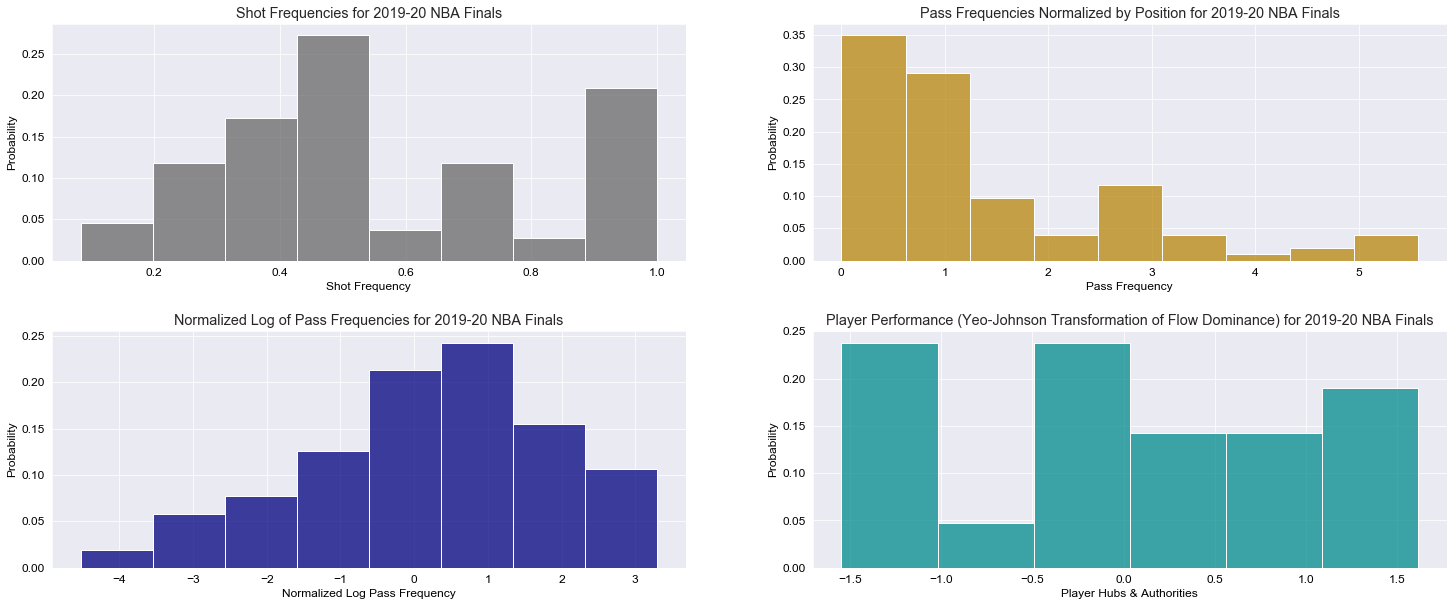

In [30]:
shot_acc_ha = norm_network_ha_dfs[5][norm_network_ha_dfs[5]['TO'] == 'SHOT_MADE']
pass_acc_ha = norm_network_ha_dfs[5][~(norm_network_ha_dfs[5]['TO'] == 'SHOT_MADE')&~(norm_network_ha_dfs[5]['TO'] == 'SHOT_MISS')]
norm_log_pass_acc_ha = norm_network_ha_dfs[5][~(norm_network_ha_dfs[5]['TO'] == 'SHOT_MADE')&~(norm_network_ha_dfs[5]['TO'] == 'SHOT_MISS')]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(25, 10))
plt.rcParams.update({'font.size': 12})


ax1 = sns.histplot(shot_acc, x="FREQUENCY", stat='probability', color='dimgrey', ax=ax1)
ax2 = sns.histplot(pass_acc, x="FREQUENCY", stat='probability', color="darkgoldenrod", ax=ax2)
ax3 = sns.histplot(norm_log_pass_acc, x="norm_log_FREQUENCY", stat='probability', color='navy', ax=ax3)
ax4 = sns.histplot(centrality_ha_dfs[5], x="player_performance_fdom", stat='probability', color='darkcyan', ax=ax4)

ax1.set(xlabel='Shot Frequency')
ax1.set_title('Shot Frequencies for 2019-20 NBA Finals')
ax2.set(xlabel='Pass Frequency')
ax2.set_title('Pass Frequencies Normalized by Position for 2019-20 NBA Finals')
ax3.set(xlabel='Normalized Log Pass Frequency')
ax3.set_title('Normalized Log of Pass Frequencies for 2019-20 NBA Finals')
ax4.set(xlabel='Player Hubs & Authorities')
ax4.set_title('Player Performance (Yeo-Johnson Transformation of Flow Dominance) for 2019-20 NBA Finals')
plt.subplots_adjust(hspace = 0.3)
custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
ax = sns.set_style("darkgrid", rc=custom_style)
plt.show()

Similar to flow centrality distributions, we are only looking at the latest game here so the distributions should be viewed with caution. Directional normality is sufficient for this purpose, but I do suggest at the end that future studies look to expand this study for a broader set of games.

### 3.2 Assessment of Player Performance

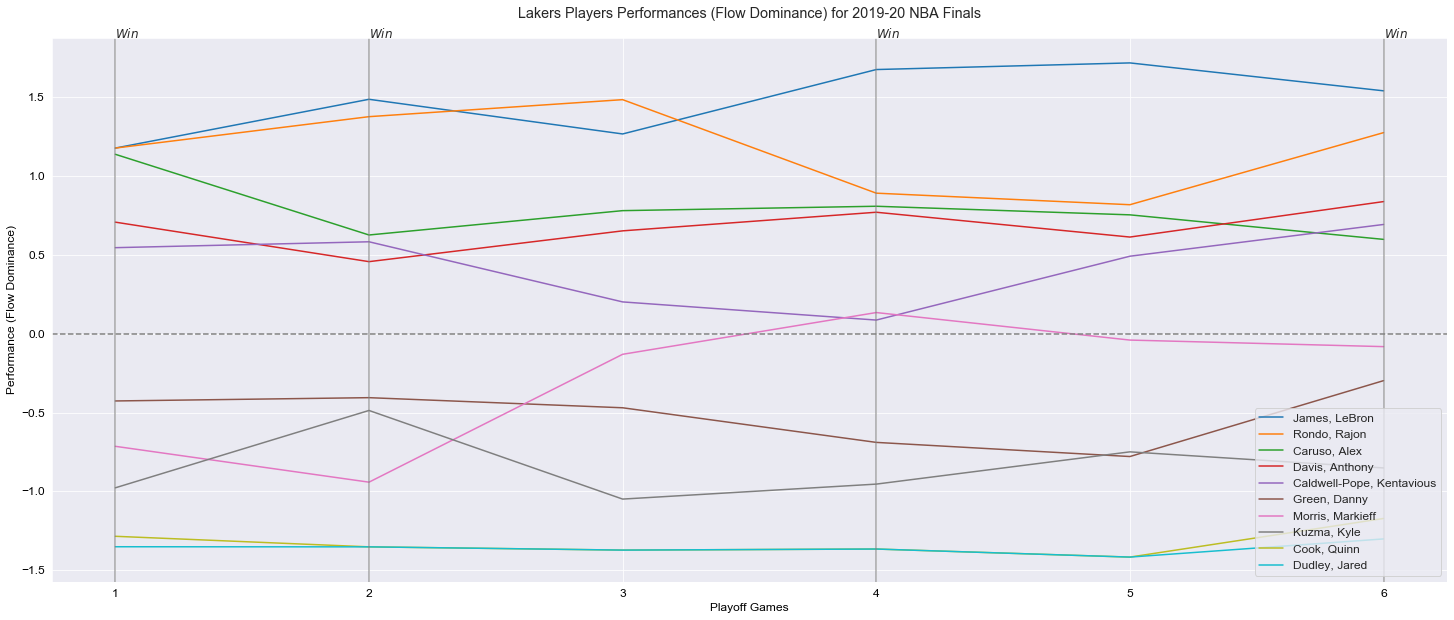

In [13]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.rcParams.update({'font.size': 12})
ax = sns.lineplot(data=team1_perf_ha_df, x='Game', y='Performance (Flow Dominance)', hue='Player')

ax.axvline(1, color='gray', lw=2, alpha=0.5)
ax.axvline(2, color='gray', lw=2, alpha=0.5)
ax.axvline(4, color='gray', lw=2, alpha=0.5)
ax.axvline(6, color='gray', lw=2, alpha=0.5)

ax.text(1, 1.88, r'$Win$')
ax.text(2, 1.88, r'$Win$')
ax.text(4, 1.88, r'$Win$')
ax.text(6, 1.88, r'$Win$')

ax.axhline(0, color="gray", linestyle ="--")
        
ax.set(xlabel='Playoff Games')
ax.set_title(f'{team1} Players Performances (Flow Dominance) for 2019-20 NBA Finals', pad=20)
ax.legend(loc='lower right')
custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
ax = sns.set_style("darkgrid", rc=custom_style)
plt.show()

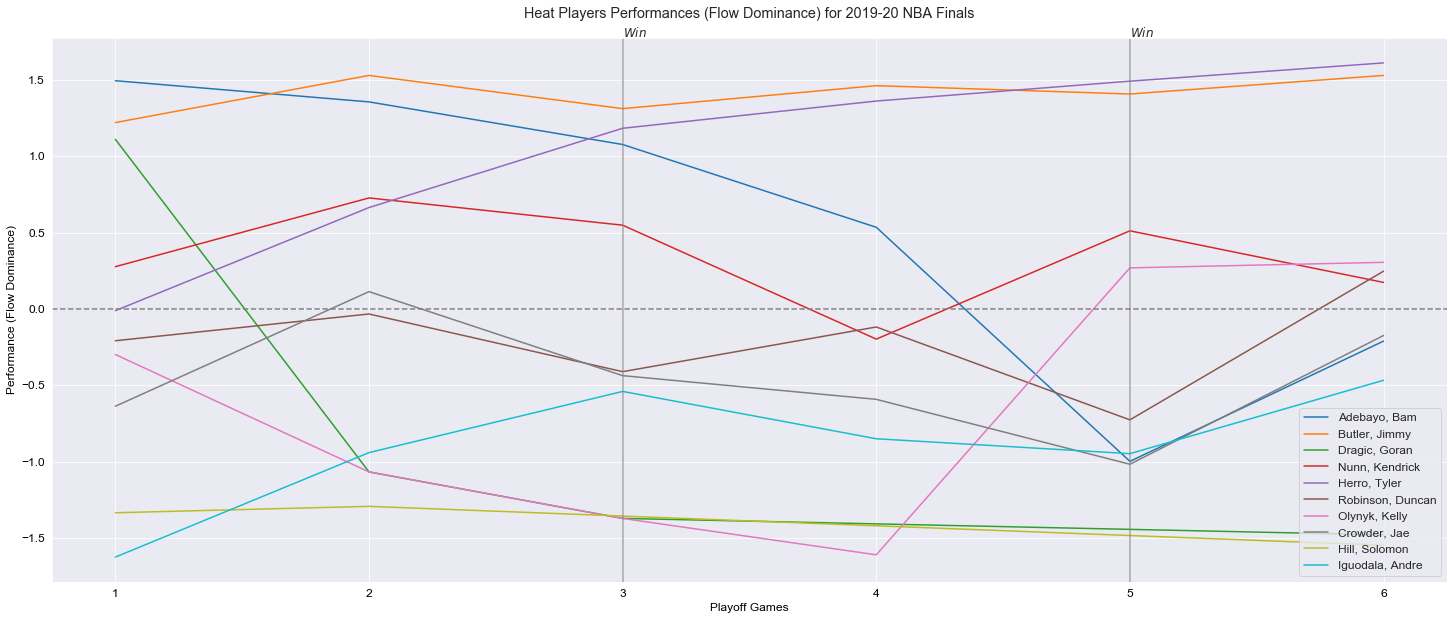

In [14]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.rcParams.update({'font.size': 12})
ax = sns.lineplot(data=team2_perf_ha_df, x='Game', y='Performance (Flow Dominance)', hue='Player')

ax.axvline(3, color='gray', lw=2, alpha=0.5)
ax.axvline(5, color='gray', lw=2, alpha=0.5)

ax.text(3, 1.78, r'$Win$')
ax.text(5, 1.78, r'$Win$')
        
ax.axhline(0, color="gray", linestyle ="--")

ax.set(xlabel='Playoff Games')
ax.set_title(f'{team2} Players Performances (Flow Dominance) for 2019-20 NBA Finals', pad=20)
ax.legend(loc='lower right')
custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
ax = sns.set_style("darkgrid", rc=custom_style)
plt.show()

Looking at Player Performances, we can see a better differentiation between the A-list players on the team and the rest. Anthony Davis does come up in the positive range for the Lakers and there is a strong difference amongst Tyler Herro/Jimmy Butler and the others on the Heat as the games go on. Although there are some more positives in comparison so far to flow centrality, this metric is clearly far from perfect. Rajon Rondo and Alex Caruso get rated consistently higher than Anthony Davis in the Finals and that does not seem to line up with the actual performances of those players. I think this is largely due to Guards being responsible for resetting a play and redistributing the ball in game. The point guard is a player of high trust in a game so naturally they would yield higher scores here as well. This is interesting that even after the position normalization, this does not seem to regulate for the Guards as well.

## 4. Match Performance & Overall Evaluation

### 4.1 Match Performance by Game

In [15]:
def getMatchPerformance(numavg, team1_perf, team2_perf):
    
    team1_match_perf = []
    team2_match_perf = []

    for i in range(1,7):

        one_match_sorted = np.sort(list(team1_perf[i].values()))[::-1]
        one_match_sorted = one_match_sorted[~np.isnan(one_match_sorted)]

        two_match_sorted = np.sort(list(team2_perf[i].values()))[::-1]
        two_match_sorted = two_match_sorted[~np.isnan(two_match_sorted)]

        one_match_perf = np.mean(one_match_sorted[:numavg])
        two_match_perf = np.mean(two_match_sorted[:numavg])

        team1_match_perf.append(one_match_perf)
        team2_match_perf.append(two_match_perf)
    
    
    return team1_match_perf, team2_match_perf

def getMatchPerfdf(team1_match, team2_match, metric):

    if metric == 'fdom':
        perf = 'Performance (Flow Dominance)'
    elif metric == 'fcen':
        perf = 'Performance (Flow Centrality)'
    
    team1_match_df = pd.DataFrame({perf: team1_match,
                                         'Team': [f'{team1}']*6,
                                         'Game': [1, 2, 3, 4, 5, 6]})

    team2_match_df = pd.DataFrame({perf: team2_match,
                                        'Team': [f'{team2}']*6,
                                        'Game': [1, 2, 3, 4, 5, 6]})

    match_perf = team1_match_df.append(team2_match_df, ignore_index=True)
    differences = [x - y for x,y in list(zip(match_perf[match_perf['Team'] == f'{team1}'][perf].values, match_perf[match_perf['Team'] == f'{team2}'][perf].values))]
    differences_df = pd.DataFrame({perf: differences,
                                   'Team': ['Difference']*6,
                                   'Game': [1, 2, 3, 4, 5, 6]})
    match_perf = match_perf.append(differences_df, ignore_index=True)

    team1_outcome_pred = np.where(match_perf[match_perf['Team'] == 'Difference'][perf] > 0, 1, 0)
    match_perf.loc[match_perf['Team'] == 'Difference', perf] = np.abs(match_perf[match_perf['Team'] == 'Difference'][perf])
    
    
    return match_perf, team1_outcome_pred


In [28]:
auc = []
auc_ha = []

for i in range(1, 11):
    team1_match_perf, team2_match_perf = getMatchPerformance(i, team1_perf, team2_perf)
    match_perf, team1_outcome_pred = getMatchPerfdf(team1_match_perf, team2_match_perf, metric='fcen')
    curr_auc = roc_auc_score(team1_outcome, team1_outcome_pred)
    auc.append(curr_auc)
    
    team1_match_perf_ha, team2_match_perf_ha = getMatchPerformance(i, team1_perf_ha, team2_perf_ha)
    match_perf_ha, team1_outcome_pred_ha = getMatchPerfdf(team1_match_perf_ha, team2_match_perf_ha, metric='fdom')
    curr_auc_ha = roc_auc_score(team1_outcome, team1_outcome_pred_ha)
    auc_ha.append(curr_auc_ha)
    
auc_df = pd.DataFrame({'auc': auc,
                       'Number of Players': np.arange(1,11)})

team1_match_perf, team2_match_perf = getMatchPerformance(1, team1_perf, team2_perf)
match_perf, team1_outcome_pred = getMatchPerfdf(team1_match_perf, team2_match_perf, metric='fcen')

auc_ha_df = pd.DataFrame({'auc_ha': auc_ha,
                          'Number of Players': np.arange(1,11)})

team1_match_perf_ha, team2_match_perf_ha = getMatchPerformance(3, team1_perf_ha, team2_perf_ha)
match_perf_ha, team1_outcome_ha_pred = getMatchPerfdf(team1_match_perf_ha, team2_match_perf_ha, metric='fdom')

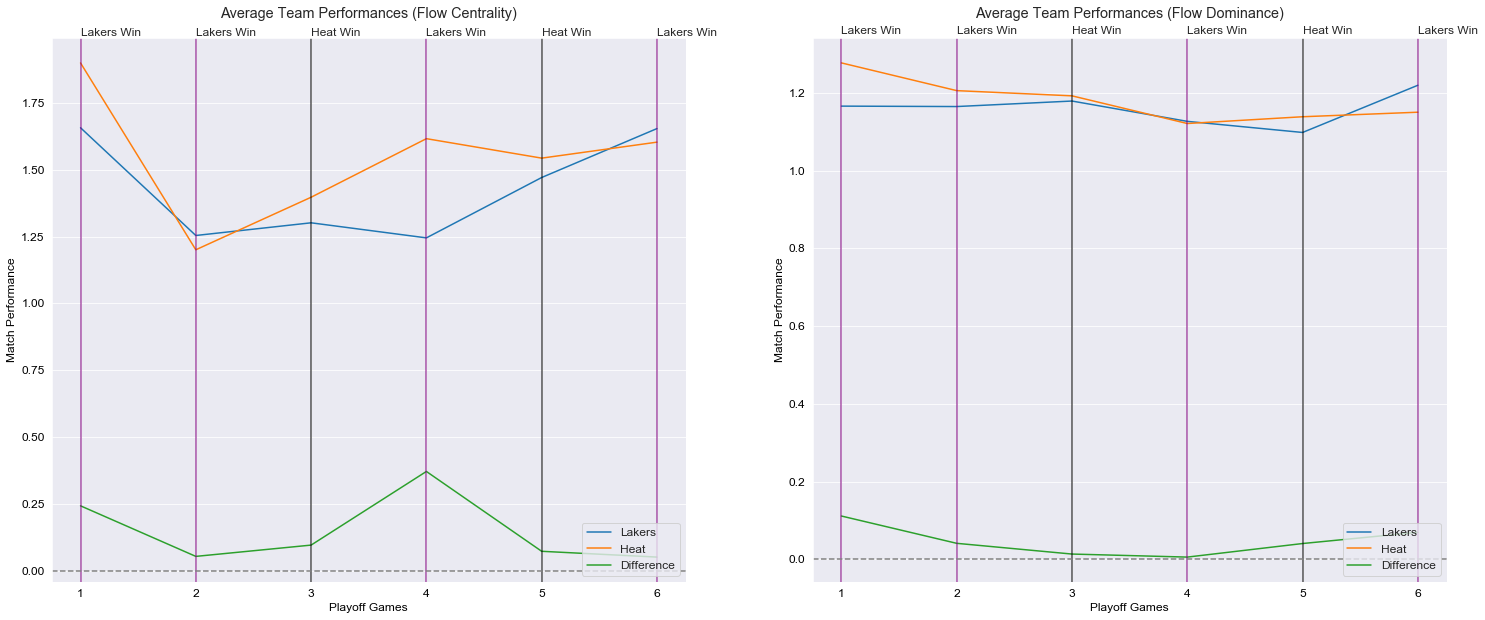

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
plt.rcParams.update({'font.size': 12})
ax1 = sns.lineplot(data=match_perf, x='Game', y='Performance (Flow Centrality)', hue='Team', ax=ax1)
ax2 = sns.lineplot(data=match_perf_ha, x='Game', y='Performance (Flow Dominance)', hue='Team', ax=ax2)

ax1.axvline(1, color='purple', lw=2, alpha=0.5)
ax1.axvline(2, color='purple', lw=2, alpha=0.5)
ax1.axvline(4, color='purple', lw=2, alpha=0.5)
ax1.axvline(6, color='purple', lw=2, alpha=0.5)

ax1.text(1, 2, f'{team1} Win')
ax1.text(2, 2, f'{team1} Win')
ax1.text(4, 2, f'{team1} Win')
ax1.text(6, 2, f'{team1} Win')

ax1.axvline(3, color='black', lw=2, alpha=0.5)
ax1.axvline(5, color='black', lw=2, alpha=0.5)

ax1.text(3, 2, f'{team2} Win')
ax1.text(5, 2, f'{team2} Win')

ax1.axhline(0, color="gray", linestyle ="--")
        
ax1.set(xlabel='Playoff Games', ylabel='Match Performance')
ax1.set_title('Average Team Performances (Flow Centrality)', pad=20)
ax1.legend(loc='lower right')


ax2.axvline(1, color='purple', lw=2, alpha=0.5)
ax2.axvline(2, color='purple', lw=2, alpha=0.5)
ax2.axvline(4, color='purple', lw=2, alpha=0.5)
ax2.axvline(6, color='purple', lw=2, alpha=0.5)

ax2.text(1, 1.35, f'{team1} Win')
ax2.text(2, 1.35, f'{team1} Win')
ax2.text(4, 1.35, f'{team1} Win')
ax2.text(6, 1.35, f'{team1} Win')

ax2.axvline(3, color='black', lw=2, alpha=0.5)
ax2.axvline(5, color='black', lw=2, alpha=0.5)

ax2.text(3, 1.35, f'{team2} Win')
ax2.text(5, 1.35, f'{team2} Win')

ax2.axhline(0, color="gray", linestyle ="--")
        
ax2.set(xlabel='Playoff Games', ylabel='Match Performance')
ax2.set_title('Average Team Performances (Flow Dominance)', pad=20)
ax2.legend(loc='lower right')


custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
ax = sns.set_style("darkgrid", rc=custom_style)
plt.show()

As done in the Duch, et al. paper, we can take the average of n number of players for a given team and that aggregates to an appropriate metric for team performance. This is the average of the lowest number of players that yielded the highest AUC for each metric; so that is the top 1 player for flow centrality and top 3 players for flow dominance. Although we are only looking at a few games in this analysis, we are looking at the NBA Finals - so these are games played by two of the best teams in that year. Both teams have won countless games against several high performing teams and players. So, when we assess match performance for a team, we should ideally see the difference between the two teams to be relatively minimal and lining up with the team that wins that game. We do see less dispersion of difference between Lakers and Heat using flow dominance, but the Heat gets rated higher in the first two games even though they lost. Flow Centrality having a decent amount of dispersion could also be attributed to the fact that it is mainly looking at the top 1 player, so it is difficult to conclude much about either metric at this aggregated level without viewing more games.

### 4.2 AUC & ROC Analysis

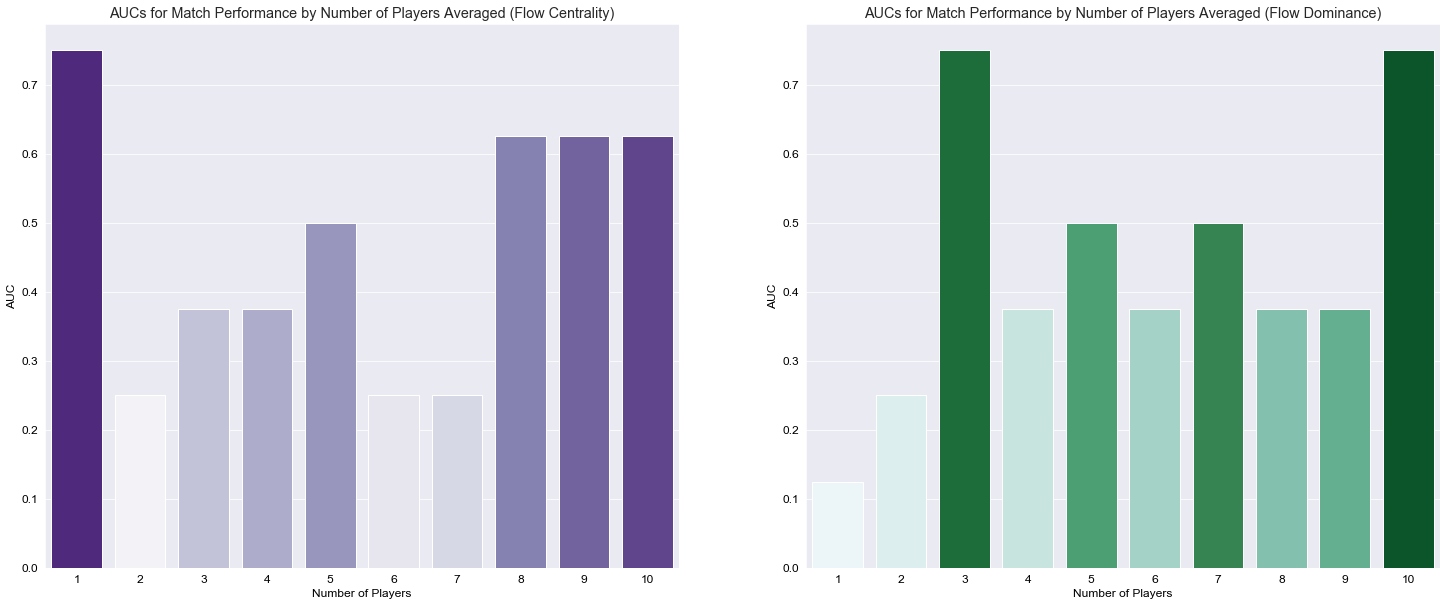

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
plt.rcParams.update({'font.size': 12})

pal1 = sns.color_palette("Purples", len(auc_df))
rank1 = auc_df.auc.argsort().argsort()
pal2 = sns.color_palette("BuGn", len(auc_ha_df))
rank2 = auc_ha_df.auc_ha.argsort().argsort()

ax1 = sns.barplot(x="Number of Players", y="auc", data=auc_df, palette=np.array(pal1)[rank1], ax=ax1)
ax2 = sns.barplot(x="Number of Players", y="auc_ha", data=auc_ha_df, palette=np.array(pal2)[rank2], ax=ax2)
        
ax1.set(xlabel='Number of Players', ylabel='AUC')
ax1.set_title('AUCs for Match Performance by Number of Players Averaged (Flow Centrality)')
ax2.set(xlabel='Number of Players', ylabel='AUC')
ax2.set_title('AUCs for Match Performance by Number of Players Averaged (Flow Dominance)')
custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
ax = sns.set_style("darkgrid", rc=custom_style)
plt.show()

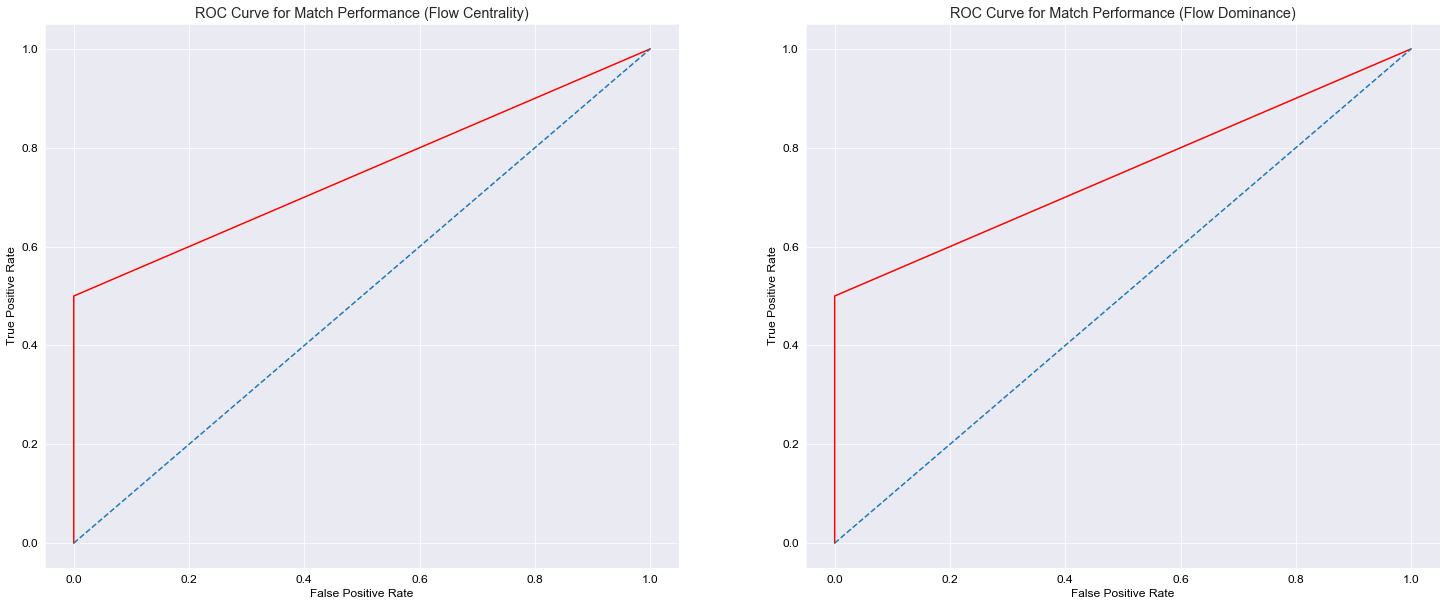

In [19]:
FPR1, TPR1, _ = roc_curve(team1_outcome, team1_outcome_pred)
FPR2, TPR2, _ = roc_curve(team1_outcome, team1_outcome_ha_pred)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
plt.rcParams.update({'font.size': 12})

ax1.plot(FPR1, TPR1, linestyle="-", color="r")
ax1.plot([0, 1], ls="--")
ax2.plot(FPR2, TPR2, linestyle="-", color="r")
ax2.plot([0, 1], ls="--")

ax1.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
ax1.set_title('ROC Curve for Match Performance (Flow Centrality)')
ax2.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
ax2.set_title('ROC Curve for Match Performance (Flow Dominance)')

custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
ax = sns.set_style("darkgrid", rc=custom_style)

Looking at the AUCs (area under curve) for each metric related to match performance and outcomes, we see that both metrics do not do as well, but flow dominance does perform better when including more players whereas flow centrality performs best when including just the top 1 player. Although it is a good sign that an average of more players on the team leads to higher values, we are only looking at 6 games so this can easily get swayed in a different direction when assessing a larger number of players, teams, and games.

The ROC Curve analysis confirms that we are not looking at enough games to fully assess the match performance of either metric as they both have the same True Positive Rate/False Positive Rate curve. This is due to there being less nuance in a series of 6 games, but according to ROC curves for our 6 games - both metrics perform equally poorly/well for match performance.

### 4.3 Correlation to Traditional Metrics

As a final assessment of each metric, we can look at the correlation to big 5 metrics (Total Rebounds, Assists, Steals, Blocks, Points) for each team and overall. Ideally, we want a metric that has a moderate to strong positive correlation to those 5 metrics which commonly represent a player playing basketball well. Alongside correlation heatmap, we can view the scatterplot matrix that differentiates games won/lost for each team in case there's differences dependent on outcome.

In [20]:
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=1610612747)
games = gamefinder.get_data_frames()[0]
games_inseason = games[games.SEASON_ID.str[-4:] == '2019']
playoff_inseason_ids = list(games_inseason.head(6)['GAME_ID'])

team1_games_stats = pd.DataFrame(columns = ['TOT_REB', 'AST', 'STL', 'BLK', 'PTS', 'Player', 'Game'])
team2_games_stats = pd.DataFrame(columns = ['TOT_REB', 'AST', 'STL', 'BLK', 'PTS', 'Player', 'Game'])
game_cols = ['TOT_REB', 'AST', 'STL', 'BLK', 'PTS']
for i, game in enumerate(playoff_inseason_ids):

    for l in team1_players:
        gamefinder_one = cumestatsplayer.CumeStatsPlayer(game_ids=game, player_id=l[1])
        one_game = gamefinder_one.get_data_frames()[0][game_cols]
        one_game['Player'] = l[2]
        one_game['Game'] = i+1
        team1_games_stats = team1_games_stats.append(one_game)
        
        time.sleep(.600)
        
    for m in team2_players:
        gamefinder_two = cumestatsplayer.CumeStatsPlayer(game_ids=game, player_id=m[1])
        two_game = gamefinder_two.get_data_frames()[0][game_cols]
        two_game['Player'] = m[2]
        two_game['Game'] = i+1
        team2_games_stats = team2_games_stats.append(two_game)
        
        time.sleep(.600)
        
team1_df = team1_perf_df.merge(team1_perf_ha_df, on=['Game', 'Player', 'Outcome'])
team2_df = team2_perf_df.merge(team2_perf_ha_df, on=['Game', 'Player', 'Outcome'])
        
final_team1_df = team1_df.merge(team1_games_stats, on=['Game', 'Player'])
final_team2_df = team2_df.merge(team2_games_stats, on=['Game', 'Player'])
num_attribs = ['Performance (Flow Centrality)', 'Performance (Flow Dominance)', 'TOT_REB', 'AST', 'STL', 'BLK', 'PTS', 'Outcome']
final_team1_df[num_attribs] = final_team1_df[num_attribs].astype(float)
final_team2_df[num_attribs] = final_team2_df[num_attribs].astype(float)
final_team1_df = final_team1_df[num_attribs].sort_values(['Outcome'], ascending=False)
final_team2_df = final_team2_df[num_attribs].sort_values(['Outcome'], ascending=False)

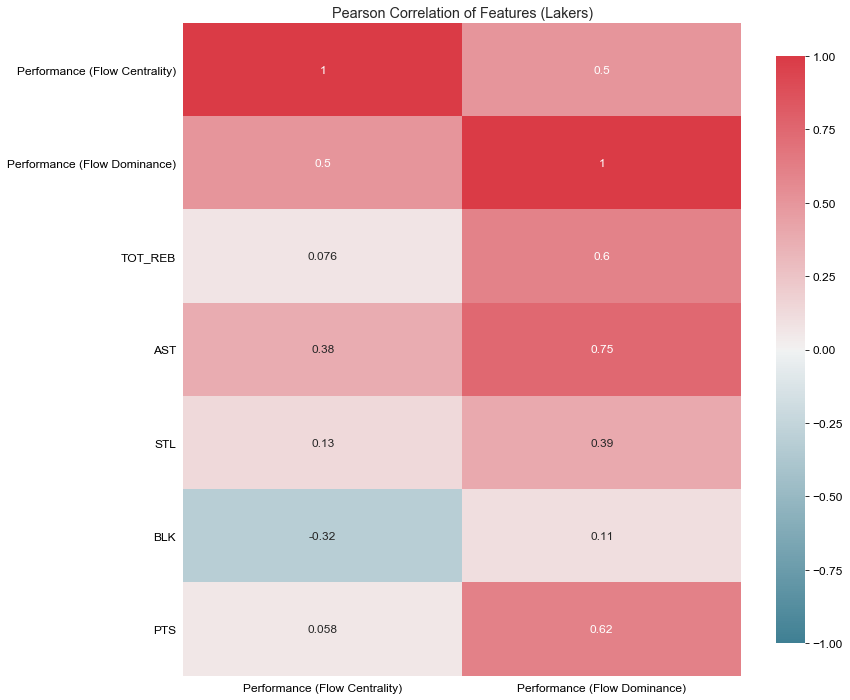

In [21]:
fig, ax = plt.subplots(figsize=(12.5,12))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.rcParams.update({'font.size': 12})
ax = sns.heatmap(final_team1_df[['Performance (Flow Centrality)', 'Performance (Flow Dominance)', 'TOT_REB', 'AST', 'STL', 'BLK', 'PTS']]
                 .corr()[['Performance (Flow Centrality)', 'Performance (Flow Dominance)']], 
                 cmap=colormap, cbar_kws={'shrink':.9 }, annot=True, vmin=-1, vmax=1, linecolor='white', annot_kws={'fontsize':12 })
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set(title="Pearson Correlation of Features (Lakers)")
plt.show()

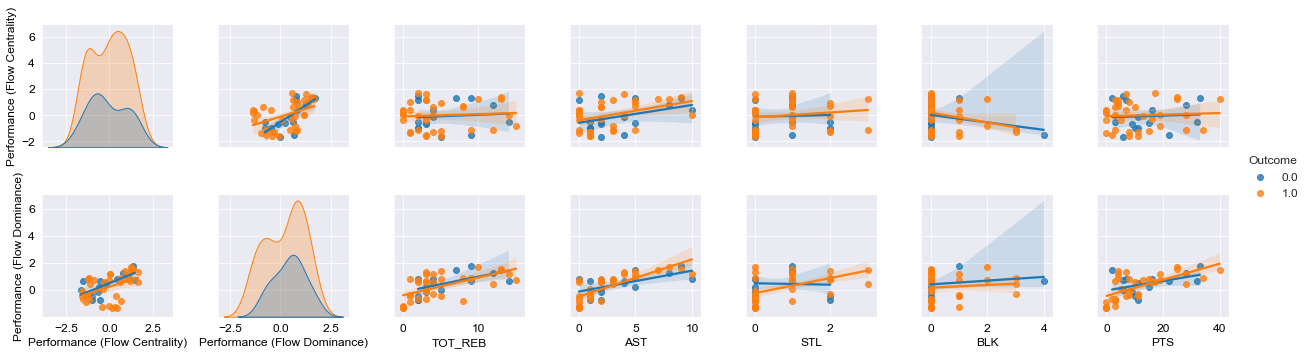

In [22]:
ax = sns.pairplot(final_team1_df, y_vars=['Performance (Flow Centrality)', 'Performance (Flow Dominance)'], hue='Outcome', kind='reg')
plt.show()

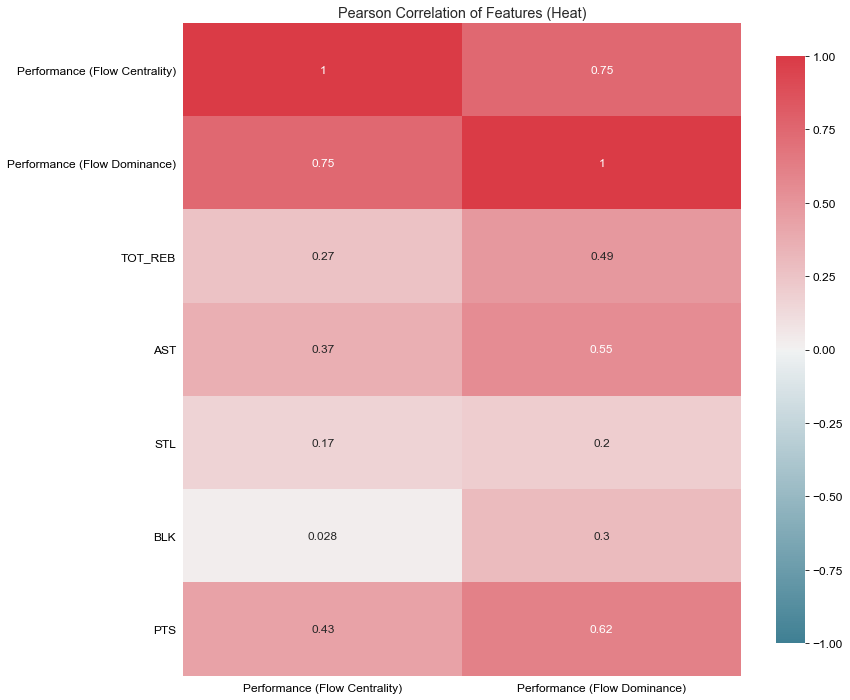

In [23]:
fig, ax = plt.subplots(figsize=(12.5,12))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.rcParams.update({'font.size': 12})
ax = sns.heatmap(final_team2_df[['Performance (Flow Centrality)', 'Performance (Flow Dominance)', 'TOT_REB', 'AST', 'STL', 'BLK', 'PTS']]
                 .corr()[['Performance (Flow Centrality)', 'Performance (Flow Dominance)']], 
                 cmap=colormap, cbar_kws={'shrink':.9 }, annot=True, vmin=-1, vmax=1, linecolor='white', annot_kws={'fontsize':12 })
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set(title="Pearson Correlation of Features (Heat)")
plt.show()

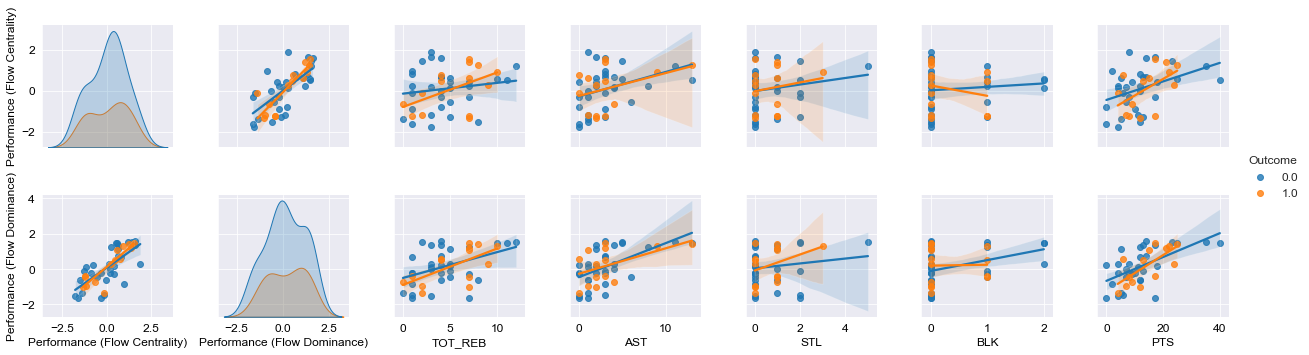

In [24]:
ax = sns.pairplot(final_team2_df, y_vars=['Performance (Flow Centrality)', 'Performance (Flow Dominance)'], hue='Outcome', kind='reg')
plt.show()

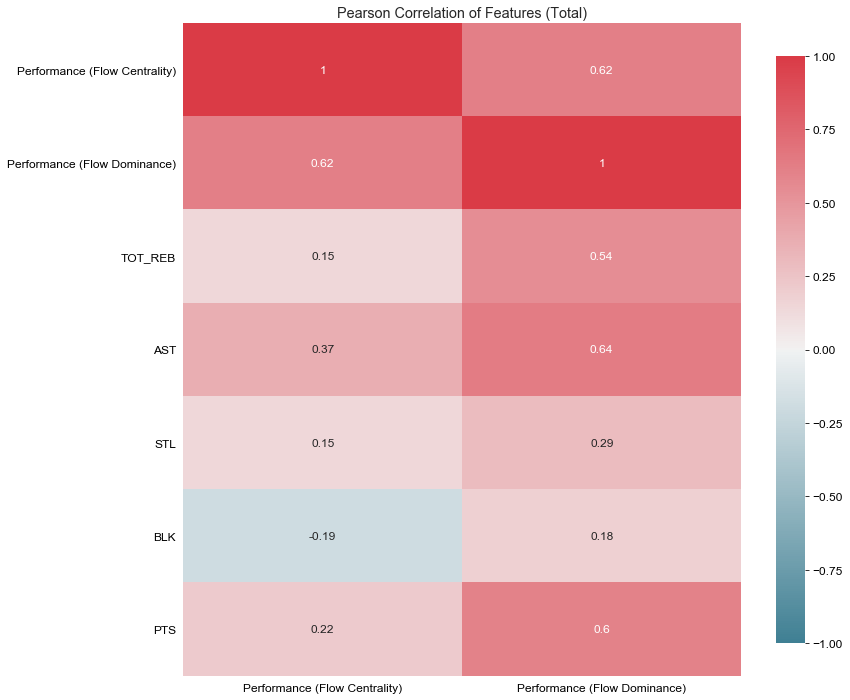

In [25]:
final_df = final_team1_df.append(final_team2_df, ignore_index=True).drop(columns=['Outcome'])

fig, ax = plt.subplots(figsize=(12.5,12))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.rcParams.update({'font.size': 12})
ax = sns.heatmap(final_df.corr()[['Performance (Flow Centrality)', 'Performance (Flow Dominance)']], 
                 cmap=colormap, cbar_kws={'shrink':.9 }, annot=True, vmin=-1, vmax=1, linecolor='white', annot_kws={'fontsize':12 })
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set(title="Pearson Correlation of Features (Total)")
plt.show()

Across the board, we see stronger correlation for flow dominance to the big 5 basketball metrics as opposed to flow centrality. Since we are assessing Pass/Shot frequency in our model, it makes sense that the highest correlation values are for assists and points, but what is more interesting is that flow dominance appears to partially correlate to defensive metrics (steals or blocks) better than flow centrality as well. An important caveat, especially for the defensive metrics, is that we are looking at a very small amount of data points as those do not happen as often as passing/shooting, so only looking at 6 games for each team is going to skew the values.

Regardless of the minor amount of data points, we do see greater utility in using flow dominance to assess player performance and match performance in basketball games.

## 5. Final Analysis & Conclusion

After recreating Duch et al.'s work to model flow sports using networks, I found their metric of flow centrality to not be an effective measure to assess performance in basketball. It was able to capture players who came in between a path to the basket, but the details of how basketball is played differs enough from soccer that it caused enough complications in the metric's application. In basketball, there can be multiple shortest paths on a given play and each player is being evaluated by his teammates at a rapid frequency in almost each play. This creates a 'rich-get-richer' phenomena in basketball which prompted me to establish that we assess basketball through a different flow dynamic metric: flow dominance. Using flow dominance, we can differentiate players who control the ball and play strategy more effectively than flow centrality, but it is not without its issues. Flow dominance is strictly an offensive metric; in basketball, players play both offense and defense, meaning this is not a wholistic metric for performance. Additionally, although flow dominance had lower dispersion when assessing team performance for a match, it still performed poorly overall for aggregating player performances to the team. I ended my analysis by looking at the correlation of the two metrics to the big 5 metrics in basketball and saw medium to moderate correlations across the board for flow dominance. Although flow dominance had a strong correlation to points, we see through the network visualizations that it appears to encode for more than just points. Even players who may not be doing well in the core stats could yield a relatively moderate flow dominance score, and this is because teammates trust this player in the strategy they are employing. Therefore, I claim that flow dominance through networks can be used to model individuals engaging in the zone of proximal development (playing a flow sport like basketball) and healthy reciprocity (receiving and passing the ball even if traditional metrics claim performance is low). With this, I reason that we can expand on Duch et al.'s work to assess complex, engaging social activities by using a different flow dynamic metric, but the dynamic of the activity needs to be considered to appropriately model it.

There are at least a few different avenues one could take to further the analysis. The first obvious one would be extending the scope of games and looking at most of the regular season for a team to see how flow dominance attributes player performance and match performance for a team. This would also yield a more nuanced analysis of ROC curves, alongside similar validation techniques that Duch et al. performed in their paper. In addition to that, I think it would be valuable to add stronger regulization penalties to those who are expected to have the ball more often (like point guards) or even weigh those who make shots higher to add significance to those who actually result in scoring the ball.